In [3]:
# from prepare import *
import gc
import pickle
import pandas as pd

df_ids = pd.read_csv('E:/NUS/data/codedata/mimiciv_key_ids.csv')

# export

In [4]:
def load_patient_object(filepath):
    with open(filepath, 'rb') as input:  
        return pickle.load(input)

def split_modalities_by_patient(patient):
    return {
        "meta": {
            "subject_id": patient.subject_id,
        },
        "tabular": {
            "demographics": patient.demographics,
            "admissions": patient.admissions,
            "icustays": patient.icustays,
            "transfers": patient.transfers,
        },
        "timeseries": {
            "labevents": patient.labevents,
            "chartevents": patient.chartevents,
            "inputevents": patient.inputevents,
            "outputevents": patient.outputevents,
            "procedureevents": patient.procedureevents,
        },
        "diagnosis": {
            "diagnoses_icd": patient.diagnoses_icd,
            "procedures_icd": patient.procedures_icd,
        },
        "medication": {
            "prescriptions": patient.prescriptions,
        },
        "text": {
            "radnotes": patient.radnotes,
            "ecgnotes": patient.ecgnotes,
            "echonotes": patient.echonotes,
            "dsnotes": patient.dsnotes,
        },
        "image": {
            "cxr_table": patient.cxr,
            "imcxr": patient.imcxr,
        },
    }



In [ ]:
#读取all paths
import os
import pickle
import pandas as pd

root = "E:/NUS/data/codedata/sample_patients"

all_pkl_paths = []

for folder in sorted(os.listdir(root)):
    folder_path = os.path.join(root, folder)
    if not os.path.isdir(folder_path):
        continue

    for fname in os.listdir(folder_path):
        if fname.endswith(".pkl"):
            all_pkl_paths.append(os.path.join(folder_path, fname))

print(f"Total pkl files found: {len(all_pkl_paths)}")


Total pkl files found: 5000


In [45]:
patient.__dict__.keys()

dict_keys(['admissions', 'demographics', 'transfers', 'core', 'diagnoses_icd', 'drgcodes', 'emar', 'emar_detail', 'hcpcsevents', 'labevents', 'microbiologyevents', 'poe', 'poe_detail', 'prescriptions', 'procedures_icd', 'services', 'procedureevents', 'outputevents', 'inputevents', 'icustays', 'datetimeevents', 'chartevents', 'cxr', 'imcxr', 'noteevents', 'dsnotes', 'ecgnotes', 'echonotes', 'radnotes'])

In [52]:
import numpy as np

for k, v in patient.__dict__.items():
    if isinstance(v, np.ndarray):
        print(k, v.dtype, v.shape)

In [ ]:
# 读取patient，这一部分可以单独读取其实，不然太耗时了每次重新跑

LABELS_GOOD = [
 'Atelectasis', 'Cardiomegaly', 'Consolidation',
 'Edema', 'Enlarged Cardiomediastinum',
 'Lung Opacity', 'Pneumonia', 'Pneumothorax'
]

stats = {
    "num_patients": 0,
    "patients_with_cxr": 0,
    "patients_with_any_labeled_cxr": 0,
    "total_cxr": 0,
    "labeled_cxr": 0,
}

for pkl_path in all_pkl_paths:
    try:
        with open(pkl_path, "rb") as f:
            patient = pickle.load(f)
    except Exception as e:
        print(f"Failed to load {pkl_path}: {e}")
        continue

    stats["num_patients"] += 1

    if not hasattr(patient, "cxr") or patient.cxr is None:
        continue

    cxr = patient.cxr
    if len(cxr) == 0:
        continue

    stats["patients_with_cxr"] += 1
    stats["total_cxr"] += len(cxr)

    # 判断是否有任意一张 CXR 有正标签
    has_labeled = False
    for _, row in cxr.iterrows():
        if any(row.get(k) == 1 for k in LABELS_GOOD):
            has_labeled = True
            stats["labeled_cxr"] += 1

    if has_labeled:
        stats["patients_with_any_labeled_cxr"] += 1



In [61]:
print("===== CXR Label Coverage Summary =====")
for k, v in stats.items():
    print(f"{k}: {v}")

===== CXR Label Coverage Summary =====
num_patients: 5000
patients_with_cxr: 5000
patients_with_any_labeled_cxr: 4287
total_cxr: 71725
labeled_cxr: 49017


In [10]:
cxr.head(3)


,dicom_id,study_id,subject_id,split,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,...,StudyTimeForm,cxrtime,Unnamed: 0,Img_Filename,Img_Folder,Note,Note_file,Note_folder,charttime,deltacharttime
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,21:30:14.531000,2180-05-06 21:30:14.531,4.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg,files/p10/p10000032/s50414267,FINAL REPORT\...,s50414267.txt,files/p10/p10000032,2180-05-06 21:30:00,-1863.083333
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,21:30:14.531000,2180-05-06 21:30:14.531,5.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg,files/p10/p10000032/s50414267,FINAL REPORT\...,s50414267.txt,files/p10/p10000032,2180-05-06 21:30:00,-1863.083333
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,16:55:00.312000,2180-06-26 16:55:00.312,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab.jpg,files/p10/p10000032/s53189527,FINAL REPORT\...,s53189527.txt,files/p10/p10000032,2180-06-26 16:55:00,-643.666667


In [ ]:
import pickle
import pandas as pd
from tqdm import tqdm
# 为后面构造标签使用

cxr_tables = []

for pkl_path in tqdm(all_pkl_paths, desc="Building cxr_all"):
    try:
        with open(pkl_path, "rb") as f:
            patient = pickle.load(f)
    except Exception:
        continue

    # 安全检查
    if not hasattr(patient, "cxr"):
        continue
    if patient.cxr is None or len(patient.cxr) == 0:
        continue

    cxr = patient.cxr.copy()

    # 加 patient_id（如果没有）
    if "subject_id" not in cxr.columns:
        cxr["subject_id"] = getattr(patient, "subject_id", None)

    cxr_tables.append(cxr)

cxr_all = pd.concat(cxr_tables, ignore_index=True)

print("cxr_all shape:", cxr_all.shape)
cxr_all.head()


Building cxr_all: 100%|██████████| 5000/5000 [01:19<00:00, 62.62it/s]


cxr_all shape: (71725, 38)


,dicom_id,study_id,subject_id,split,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,...,StudyTimeForm,cxrtime,Unnamed: 0,Img_Filename,Img_Folder,Note,Note_file,Note_folder,charttime,deltacharttime
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,21:30:14.531000,2180-05-06 21:30:14.531,4.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg,files/p10/p10000032/s50414267,FINAL REPORT\...,s50414267.txt,files/p10/p10000032,2180-05-06 21:30:00,-1863.083333
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,21:30:14.531000,2180-05-06 21:30:14.531,5.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.jpg,files/p10/p10000032/s50414267,FINAL REPORT\...,s50414267.txt,files/p10/p10000032,2180-05-06 21:30:00,-1863.083333
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,16:55:00.312000,2180-06-26 16:55:00.312,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab.jpg,files/p10/p10000032/s53189527,FINAL REPORT\...,s53189527.txt,files/p10/p10000032,2180-06-26 16:55:00,-643.666667
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,16:55:00.312000,2180-06-26 16:55:00.312,1.0,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c.jpg,files/p10/p10000032/s53189527,FINAL REPORT\...,s53189527.txt,files/p10/p10000032,2180-06-26 16:55:00,-643.666667
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762.0,10000032.0,train,NaN,NaN,NaN,NaN,NaN,NaN,...,08:05:56.875000,2180-07-23 08:05:56.875,2.0,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714.jpg,files/p10/p10000032/s53911762,FINAL REPORT\...,s53911762.txt,files/p10/p10000032,2180-07-23 08:05:00,-4.500000


In [9]:
LABELS_GOOD = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation',
    'Edema', 'Enlarged Cardiomediastinum',
    'Lung Opacity', 'Pneumonia', 'Pneumothorax'
]


cxr_all[LABELS_GOOD] = cxr_all[LABELS_GOOD].fillna(0).astype(int)


y_multi = cxr_all[LABELS_GOOD].values

In [ ]:
# text none，不导出text格式数据的准备

def slice_by_time(df, t_end, hours=48, time_col="charttime"):
    if df is None or len(df) == 0 or time_col not in df.columns:
        return df
    t_start = t_end - pd.Timedelta(hours=hours)
    return df[(df[time_col] >= t_start) & (df[time_col] <= t_end)]


def build_per_cxr_dataset(
    patient,
    LABELS_GOOD,
    ts_window_hours=48,
    require_image=False,
    source_pkl=None,          
    show_progress=True,
):
    """
    Build per-CXR training samples from ONE patient.

    Each sample is fully traceable back to:
    - source patient pkl
    - exact cxr row via dicom_id
    """
    samples = []

    if not hasattr(patient, "cxr") or patient.cxr is None or len(patient.cxr) == 0:
        return samples

    cxr_df = patient.cxr.copy()
    cxr_df[LABELS_GOOD] = cxr_df[LABELS_GOOD].fillna(0).astype(int)

    imcxr = getattr(patient, "imcxr", None)
    radnotes = getattr(patient, "radnotes", None)

    iterator = tqdm(
        cxr_df.iterrows(),
        total=len(cxr_df),
        desc=f"Patient build",
        disable=not show_progress,
    )

    for _, row in iterator:

        dicom_id = row.get("dicom_id")
        cxr_time = row.get("charttime")
        delta_t = row.get("deltacharttime")

        if dicom_id is None or cxr_time is None or pd.isna(cxr_time):
            continue

        # ---------- image existence check ----------
        if require_image and imcxr is not None:
            # imcxr 是 list，靠 dicom_id 对齐
            if dicom_id not in set(cxr_df["dicom_id"]):
                continue

        # ---------- condition ----------
        condition = {
            "tabular": {
                "demographics": patient.demographics,
                "admissions": patient.admissions,
                "icustays": patient.icustays,
                "transfers": patient.transfers,
            },
            "timeseries": {
                "labevents": slice_by_time(patient.labevents, cxr_time, ts_window_hours),
                "chartevents": slice_by_time(patient.chartevents, cxr_time, ts_window_hours),
                "inputevents": slice_by_time(patient.inputevents, cxr_time, ts_window_hours),
                "outputevents": slice_by_time(patient.outputevents, cxr_time, ts_window_hours),
                "procedureevents": slice_by_time(patient.procedureevents, cxr_time, ts_window_hours),
            },
            "diagnosis": {
                "diagnoses_icd": patient.diagnoses_icd,
                "procedures_icd": patient.procedures_icd,
            },
            "medication": {
                "prescriptions": patient.prescriptions,
            },
        }

        # ---------- target ----------
        target = {
            "y_multi": row[LABELS_GOOD].values.astype(int),
            "y_any_disease": int(row[LABELS_GOOD].any()),
        }

        # ---------- image reference (不复制像素，只存 key) ----------
        target["image"] = {
            "dicom_id": dicom_id,
            "has_image": True,
        }

        # ---------- text raw ----------
        if radnotes is not None and dicom_id in radnotes.index:
            # 你之后一般只会用 radnotes.loc[dicom_id]["text"]
            target["text_raw"] = radnotes.loc[dicom_id]
        else:
            target["text_raw"] = None

        # ---------- meta (可追溯信息) ----------
        meta = {
            "dicom_id": dicom_id,
            "cxr_time": cxr_time,
            "delta_hours": delta_t,
            "source_pkl": source_pkl,   # ⭐ 核心
        }

        samples.append({
            "meta": meta,
            "condition": condition,
            "target": target,
        })

    return samples


In [59]:
radnotes = patient.radnotes

print(type(radnotes))
print(radnotes.head(5))
print(radnotes.columns)
print(radnotes.index)


<class 'pandas.core.frame.DataFrame'>
        subject_id   hadm_id   stay_id                intime  \
675089    10012438  22764825  33768181  2178-06-07T21:57:00Z   

                     outtime note_id  subject_id_1  hadm_id_1 note_type  \
675089  2178-06-08T15:51:15Z     NaN           NaN        NaN       NaN   

        note_seq charttime storetime text  offset  offset.num  deltacharttime  
675089       NaN       NaT       NaT  NaN     NaN         NaN             NaN  
Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'note_id',
       'subject_id_1', 'hadm_id_1', 'note_type', 'note_seq', 'charttime',
       'storetime', 'text', 'offset', 'offset.num', 'deltacharttime'],
      dtype='object')
Int64Index([675089], dtype='int64')


In [65]:
def get_radnote_for_cxr(
    radnotes,
    cxr_time,
    subject_id=None,
    max_hours=24,
):
    if radnotes is None or len(radnotes) == 0:
        return None

    df = radnotes

    # 确保同一 patient
    if subject_id is not None and "subject_id" in df.columns:
        df = df[df["subject_id"] == subject_id]

    if len(df) == 0 or "charttime" not in df.columns:
        return None

    # ===== timezone 对齐 =====
    rt = df["charttime"]
    ct = cxr_time

    if hasattr(rt.dt, "tz"):
        rt = rt.dt.tz_localize(None)
    if hasattr(ct, "tzinfo") and ct.tzinfo is not None:
        ct = ct.tz_localize(None)

    # ===== 核心修复：丢掉 NaT =====
    valid_mask = rt.notna()
    if valid_mask.sum() == 0:
        return None

    rt = rt[valid_mask]
    df_valid = df.loc[valid_mask]

    dt = (rt - ct).abs()

    # 再次防御：idxmin 可能仍然失败
    idx = dt.idxmin()
    if pd.isna(idx):
        return None

    if dt.loc[idx] <= pd.Timedelta(hours=max_hours):
        return df_valid.loc[idx, "text"]

    return None


def build_per_cxr_dataset(
    patient,
    LABELS_GOOD,
    ts_window_hours=48,
    require_image=False,
    source_pkl=None,
    show_progress=True,
):
    """
    Build per-CXR training samples from ONE patient.

    Each sample is traceable to:
    - patient.subject_id
    - dicom_id
    - cxr_time
    - source patient pkl
    """
    samples = []

    # ---------- sanity check ----------
    if not hasattr(patient, "cxr") or patient.cxr is None or len(patient.cxr) == 0:
        return samples

    cxr_df = patient.cxr.copy()
    cxr_df[LABELS_GOOD] = cxr_df[LABELS_GOOD].fillna(0).astype(int)

    imcxr = getattr(patient, "imcxr", None)
    radnotes = getattr(patient, "radnotes", None)

    iterator = tqdm(
        cxr_df.iterrows(),
        total=len(cxr_df),
        desc=f"Build patient {getattr(patient, 'subject_id', '')}",
        disable=not show_progress,
    )

    for _, row in iterator:

        dicom_id = row.get("dicom_id")
        cxr_time = row.get("charttime")
        delta_t = row.get("deltacharttime")

        if dicom_id is None or cxr_time is None or pd.isna(cxr_time):
            continue

        # ---------- image existence check ----------
        if require_image:
            if imcxr is None or dicom_id not in imcxr:
                continue

        # ---------- condition ----------
        condition = {
            "tabular": {
                "demographics": patient.demographics,
                "admissions": patient.admissions,
                "icustays": patient.icustays,
                "transfers": patient.transfers,
            },
            "timeseries": {
                "labevents": slice_by_time(patient.labevents, cxr_time, ts_window_hours),
                "chartevents": slice_by_time(patient.chartevents, cxr_time, ts_window_hours),
                "inputevents": slice_by_time(patient.inputevents, cxr_time, ts_window_hours),
                "outputevents": slice_by_time(patient.outputevents, cxr_time, ts_window_hours),
                "procedureevents": slice_by_time(patient.procedureevents, cxr_time, ts_window_hours),
            },
            "diagnosis": {
                "diagnoses_icd": patient.diagnoses_icd,
                "procedures_icd": patient.procedures_icd,
            },
            "medication": {
                "prescriptions": patient.prescriptions,
            },
        }

        # ---------- target ----------
        target = {
            "y_multi": row[LABELS_GOOD].values.astype(int),
            "y_any_disease": int(row[LABELS_GOOD].any()),
        }

        # ---------- image reference ----------
        target["image"] = {
            "dicom_id": dicom_id,
            "has_image": True,
        }

        # ---------- text (radiology report, time-aligned) ----------
        target["text_raw"] = get_radnote_for_cxr(
            radnotes=radnotes,
            cxr_time=cxr_time,
            subject_id=getattr(patient, "subject_id", None),
            max_hours=24,
        )

        # ---------- meta ----------
        meta = {
            "subject_id": getattr(patient, "subject_id", None),
            "dicom_id": dicom_id,
            "cxr_time": cxr_time,
            "delta_hours": delta_t,
            "source_pkl": source_pkl,
        }

        samples.append({
            "meta": meta,
            "condition": condition,
            "target": target,
        })

    return samples


In [ ]:
test_pkl = all_pkl_paths[0]   # 或 random.choice(all_pkl_paths)，随机选一个

with open(test_pkl, "rb") as f:
    patient = pickle.load(f)

samples = build_per_cxr_dataset(
    patient,
    LABELS_GOOD,
    ts_window_hours=48,
    require_image=False,
    source_pkl=test_pkl,   # ⭐ 必须
    show_progress=True,
)

print("num samples:", len(samples))

out_dir = "E:/NUS/data/perdata/per_cxr_samples_text_test"
os.makedirs(out_dir, exist_ok=True)

out_path = os.path.join(out_dir, "samples_test.pkl")
with open(out_path, "wb") as f:
    pickle.dump(samples, f, protocol=pickle.HIGHEST_PROTOCOL)

print("saved to:", out_path)


Build patient : 100%|██████████| 7/7 [00:00<00:00, 336.74it/s]

num samples: 7
saved to: E:/NUS/data/perdata/per_cxr_samples_text_test\samples_test.pkl


In [55]:
num_with_text = sum(
    s["target"]["text_raw"] is not None
    for s in samples
)

print(
    f"text matched: {num_with_text}/{len(samples)} "
    f"({num_with_text/len(samples):.2%})"
)


text matched: 2/7 (28.57%)


In [56]:
for s in samples:
    if s["target"]["text_raw"] is not None:
        print("dicom_id:", s["meta"]["dicom_id"])
        print("cxr_time:", s["meta"]["cxr_time"])
        print("text:\n", s["target"]["text_raw"][:500])
        break


dicom_id: 68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714
cxr_time: 2180-07-23 08:05:00
text:
 EXAMINATION:  CHEST (PORTABLE AP)

INDICATION:  ___ with cough  // acute process?

COMPARISON:  Chest radiograph ___

FINDINGS: 

Single frontal view of the chest provided.

There is no focal consolidation, effusion, or pneumothorax. The
cardiomediastinal silhouette is normal.  Again seen are multiple clips
projecting over the left breast and remote left-sided rib fractures.  No free
air below the right hemidiaphragm is seen.

IMPRESSION: 

No acute intrathoracic process.



In [68]:
with open(samples[0]["meta"]["source_pkl"], "rb") as f:
    patient2 = pickle.load(f)

print(patient2 is patient)  # False 没关系，内容一致即可

s = samples[0]
dicom = s["meta"]["dicom_id"]

hit = patient2.cxr[patient2.cxr["dicom_id"] == dicom]

print("match rows:", len(hit))
print(hit[["dicom_id", "charttime"]])
print("sample cxr_time:", s["meta"]["cxr_time"])



False
match rows: 1
                                       dicom_id           charttime
0  02aa804e-bde0afdd-112c0b34-7bc16630-4e384014 2180-05-06 21:30:00
sample cxr_time: 2180-05-06 21:30:00


In [69]:
print(type(patient2.imcxr))
print(type(patient2.imcxr[0]))
print(patient2.imcxr[0].shape)


<class 'list'>
<class 'numpy.ndarray'>
(224, 224)


In [ ]:
out_dir = "E:/NUS/data/perdata/per_cxr_samples"
os.makedirs(out_dir, exist_ok=True)

buffer = []
chunk_size = 100
chunk_id = 0

for i, pkl_path in enumerate(tqdm(all_pkl_paths)):
    with open(pkl_path, "rb") as f:
        patient = pickle.load(f)

    samples = build_per_cxr_dataset(
        patient,
        LABELS_GOOD,
        ts_window_hours=48,
        source_pkl=pkl_path,
        show_progress=False,
    )

    buffer.extend(samples)

    if (i + 1) % chunk_size == 0:
        out_path = os.path.join(out_dir, f"samples_chunk_{chunk_id:04d}.pkl")
        with open(out_path, "wb") as f:
            pickle.dump(buffer, f, protocol=pickle.HIGHEST_PROTOCOL)

        print(f"saved {len(buffer)} samples to {out_path}")
        buffer.clear()
        chunk_id += 1



  2%|▏         | 102/5000 [00:15<1:15:05,  1.09it/s]

saved 1446 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0000.pkl


  4%|▍         | 203/5000 [00:32<1:07:54,  1.18it/s]

saved 1397 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0001.pkl


  6%|▌         | 303/5000 [00:42<40:09,  1.95it/s]  

saved 965 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0002.pkl


  8%|▊         | 404/5000 [00:57<41:48,  1.83it/s]  

saved 1834 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0003.pkl


 10%|█         | 505/5000 [01:10<44:57,  1.67it/s]  

saved 986 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0004.pkl


 12%|█▏        | 602/5000 [01:24<1:06:31,  1.10it/s]

saved 1303 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0005.pkl


 14%|█▍        | 702/5000 [01:41<1:05:46,  1.09it/s]

saved 1932 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0006.pkl


 16%|█▌        | 805/5000 [01:59<1:00:00,  1.17it/s]

saved 1568 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0007.pkl


 18%|█▊        | 906/5000 [02:17<50:14,  1.36it/s]  

saved 1302 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0008.pkl


 20%|██        | 1003/5000 [02:28<28:53,  2.31it/s]

saved 1287 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0009.pkl


 22%|██▏       | 1107/5000 [02:38<18:33,  3.49it/s]

saved 992 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0010.pkl


 24%|██▍       | 1202/5000 [02:52<50:43,  1.25it/s]

saved 1655 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0011.pkl


 26%|██▌       | 1304/5000 [03:07<47:36,  1.29it/s]  

saved 1629 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0012.pkl


 28%|██▊       | 1403/5000 [03:18<34:17,  1.75it/s]

saved 895 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0013.pkl


 30%|██▉       | 1499/5000 [03:23<02:14, 26.06it/s]

saved 1548 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0014.pkl


 32%|███▏      | 1603/5000 [03:41<34:56,  1.62it/s]

saved 952 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0015.pkl


 34%|███▍      | 1704/5000 [03:51<20:30,  2.68it/s]

saved 1259 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0016.pkl


 36%|███▌      | 1804/5000 [04:09<53:35,  1.01s/it]  

saved 1556 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0017.pkl


 38%|███▊      | 1904/5000 [04:26<37:56,  1.36it/s]

saved 1942 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0018.pkl


 40%|████      | 2004/5000 [04:34<13:51,  3.60it/s]

saved 1119 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0019.pkl


 42%|████▏     | 2098/5000 [04:39<02:18, 20.96it/s]

saved 1820 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0020.pkl


 44%|████▍     | 2202/5000 [05:03<49:11,  1.05s/it]  

saved 1177 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0021.pkl


 46%|████▌     | 2303/5000 [05:26<53:06,  1.18s/it]  

saved 1427 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0022.pkl


 48%|████▊     | 2404/5000 [05:41<28:45,  1.50it/s]

saved 1491 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0023.pkl


 50%|█████     | 2503/5000 [05:53<24:58,  1.67it/s]

saved 1263 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0024.pkl


 52%|█████▏    | 2602/5000 [06:08<35:19,  1.13it/s]

saved 1369 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0025.pkl


 54%|█████▍    | 2705/5000 [06:22<22:46,  1.68it/s]

saved 1947 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0026.pkl


 56%|█████▌    | 2805/5000 [06:32<14:03,  2.60it/s]

saved 945 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0027.pkl


 58%|█████▊    | 2900/5000 [06:44<22:56,  1.53it/s]

saved 1211 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0028.pkl


 60%|██████    | 3003/5000 [07:01<22:50,  1.46it/s]

saved 2192 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0029.pkl


 62%|██████▏   | 3106/5000 [07:14<14:15,  2.21it/s]

saved 1365 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0030.pkl


 64%|██████▍   | 3202/5000 [07:31<27:53,  1.07it/s]

saved 1449 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0031.pkl


 66%|██████▌   | 3305/5000 [07:41<11:47,  2.40it/s]

saved 1049 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0032.pkl


 68%|██████▊   | 3404/5000 [07:56<17:14,  1.54it/s]

saved 1403 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0033.pkl


 70%|███████   | 3504/5000 [08:09<13:56,  1.79it/s]

saved 1131 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0034.pkl


 72%|███████▏  | 3602/5000 [08:16<07:52,  2.96it/s]

saved 680 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0035.pkl


 74%|███████▍  | 3700/5000 [08:28<09:51,  2.20it/s]

saved 1437 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0036.pkl


 76%|███████▌  | 3802/5000 [08:43<13:37,  1.46it/s]

saved 1554 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0037.pkl


 78%|███████▊  | 3904/5000 [08:53<05:32,  3.30it/s]

saved 1003 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0038.pkl


 80%|████████  | 4002/5000 [09:05<11:06,  1.50it/s]

saved 1675 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0039.pkl


 82%|████████▏ | 4099/5000 [09:08<00:30, 29.60it/s]

saved 1301 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0040.pkl


 84%|████████▍ | 4203/5000 [09:33<08:29,  1.56it/s]

saved 1590 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0041.pkl


 86%|████████▌ | 4302/5000 [09:48<10:43,  1.09it/s]

saved 1282 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0042.pkl


 88%|████████▊ | 4403/5000 [10:07<08:18,  1.20it/s]

saved 2632 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0043.pkl


 90%|█████████ | 4503/5000 [10:23<05:46,  1.43it/s]

saved 2935 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0044.pkl


 92%|█████████▏| 4606/5000 [10:40<05:06,  1.29it/s]

saved 1032 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0045.pkl


 94%|█████████▍| 4705/5000 [10:51<01:47,  2.74it/s]

saved 1346 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0046.pkl


 96%|█████████▌| 4803/5000 [11:05<02:31,  1.30it/s]

saved 1352 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0047.pkl


 98%|█████████▊| 4904/5000 [11:24<01:27,  1.09it/s]

saved 1871 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0048.pkl


100%|██████████| 5000/5000 [11:37<00:00,  7.16it/s]

saved 1229 samples to E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0049.pkl


In [66]:
out_dir = "E:/NUS/data/perdata/per_cxr_text_samples"
os.makedirs(out_dir, exist_ok=True)

buffer = []
chunk_size = 100
chunk_id = 0

for i, pkl_path in enumerate(tqdm(all_pkl_paths)):
    with open(pkl_path, "rb") as f:
        patient = pickle.load(f)

    samples = build_per_cxr_dataset(
        patient,
        LABELS_GOOD,
        ts_window_hours=48,
        source_pkl=pkl_path,
        show_progress=False,
    )

    buffer.extend(samples)

    if (i + 1) % chunk_size == 0:
        out_path = os.path.join(out_dir, f"samples_chunk_{chunk_id:04d}.pkl")
        with open(out_path, "wb") as f:
            pickle.dump(buffer, f, protocol=pickle.HIGHEST_PROTOCOL)

        print(f"saved {len(buffer)} samples to {out_path}")
        buffer.clear()
        chunk_id += 1

  2%|▏         | 102/5000 [00:07<19:22,  4.21it/s]

saved 1446 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0000.pkl


  4%|▍         | 203/5000 [00:26<1:10:44,  1.13it/s]

saved 1397 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0001.pkl


  6%|▌         | 302/5000 [00:37<40:00,  1.96it/s]  

saved 965 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0002.pkl


  8%|▊         | 403/5000 [00:51<46:05,  1.66it/s]  

saved 1834 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0003.pkl


 10%|█         | 506/5000 [01:05<44:08,  1.70it/s]  

saved 986 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0004.pkl


 12%|█▏        | 602/5000 [01:19<57:51,  1.27it/s]  

saved 1303 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0005.pkl


 14%|█▍        | 702/5000 [01:37<1:13:45,  1.03s/it]

saved 1932 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0006.pkl


 16%|█▌        | 804/5000 [01:55<55:46,  1.25it/s]  

saved 1568 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0007.pkl


 18%|█▊        | 903/5000 [02:13<1:06:08,  1.03it/s]

saved 1302 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0008.pkl


 20%|██        | 1002/5000 [02:25<39:52,  1.67it/s] 

saved 1287 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0009.pkl


 22%|██▏       | 1104/5000 [02:42<56:31,  1.15it/s]  

saved 992 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0010.pkl


 24%|██▍       | 1199/5000 [02:47<04:41, 13.50it/s]

saved 1655 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0011.pkl


 26%|██▌       | 1304/5000 [03:14<48:23,  1.27it/s]  

saved 1629 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0012.pkl


 28%|██▊       | 1405/5000 [03:26<30:53,  1.94it/s]

saved 895 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0013.pkl


 30%|███       | 1501/5000 [03:44<1:05:46,  1.13s/it]

saved 1548 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0014.pkl


 32%|███▏      | 1605/5000 [03:56<29:54,  1.89it/s]  

saved 952 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0015.pkl


 34%|███▍      | 1704/5000 [04:07<24:33,  2.24it/s]

saved 1259 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0016.pkl


 36%|███▌      | 1802/5000 [04:25<1:07:50,  1.27s/it]

saved 1556 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0017.pkl


 38%|███▊      | 1902/5000 [04:43<59:43,  1.16s/it]  

saved 1942 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0018.pkl


 40%|████      | 2004/5000 [04:53<16:02,  3.11it/s]

saved 1119 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0019.pkl


 42%|████▏     | 2100/5000 [05:08<47:35,  1.02it/s]

saved 1820 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0020.pkl


 44%|████▍     | 2201/5000 [05:27<56:02,  1.20s/it]

saved 1177 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0021.pkl


 46%|████▌     | 2303/5000 [05:49<50:38,  1.13s/it]  

saved 1427 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0022.pkl


 48%|████▊     | 2407/5000 [06:01<16:36,  2.60it/s]

saved 1491 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0023.pkl


 50%|█████     | 2503/5000 [06:14<26:14,  1.59it/s]

saved 1263 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0024.pkl


 52%|█████▏    | 2602/5000 [06:30<30:29,  1.31it/s]

saved 1369 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0025.pkl


 54%|█████▍    | 2705/5000 [06:45<22:22,  1.71it/s]

saved 1947 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0026.pkl


 56%|█████▌    | 2804/5000 [06:55<15:56,  2.30it/s]

saved 945 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0027.pkl


 58%|█████▊    | 2900/5000 [07:08<30:22,  1.15it/s]

saved 1211 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0028.pkl


 60%|██████    | 3003/5000 [07:19<05:54,  5.63it/s]

saved 2192 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0029.pkl


 62%|██████▏   | 3103/5000 [07:31<15:03,  2.10it/s]

saved 1365 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0030.pkl


 64%|██████▍   | 3201/5000 [07:49<36:21,  1.21s/it]

saved 1449 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0031.pkl


 66%|██████▌   | 3303/5000 [07:56<07:42,  3.67it/s]

saved 1049 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0032.pkl


 68%|██████▊   | 3403/5000 [08:12<17:29,  1.52it/s]

saved 1403 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0033.pkl


 70%|███████   | 3504/5000 [08:25<16:39,  1.50it/s]

saved 1131 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0034.pkl


 72%|███████▏  | 3604/5000 [08:34<06:09,  3.78it/s]

saved 680 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0035.pkl


 74%|███████▍  | 3703/5000 [08:46<08:13,  2.63it/s]

saved 1437 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0036.pkl


 76%|███████▌  | 3801/5000 [09:02<19:22,  1.03it/s]

saved 1554 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0037.pkl


 78%|███████▊  | 3904/5000 [09:12<06:08,  2.98it/s]

saved 1003 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0038.pkl


 80%|████████  | 4001/5000 [09:25<11:00,  1.51it/s]

saved 1675 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0039.pkl


 82%|████████▏ | 4100/5000 [09:38<10:54,  1.37it/s]

saved 1301 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0040.pkl


 84%|████████▍ | 4202/5000 [09:55<13:24,  1.01s/it]

saved 1590 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0041.pkl


 86%|████████▌ | 4301/5000 [10:11<14:45,  1.27s/it]

saved 1282 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0042.pkl


 88%|████████▊ | 4403/5000 [10:31<09:54,  1.00it/s]

saved 2632 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0043.pkl


 90%|█████████ | 4503/5000 [10:49<05:19,  1.55it/s]

saved 2935 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0044.pkl


 92%|█████████▏| 4607/5000 [11:08<05:25,  1.21it/s]

saved 1032 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0045.pkl


 94%|█████████▍| 4706/5000 [11:20<01:48,  2.71it/s]

saved 1346 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0046.pkl


 96%|█████████▌| 4803/5000 [11:36<02:48,  1.17it/s]

saved 1352 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0047.pkl


 98%|█████████▊| 4903/5000 [11:58<01:48,  1.11s/it]

saved 1871 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0048.pkl


100%|██████████| 5000/5000 [12:11<00:00,  6.83it/s]

saved 1229 samples to E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0049.pkl


In [63]:
def stat_radnote_charttime(patient):
    radnotes = getattr(patient, "radnotes", None)

    if radnotes is None or len(radnotes) == 0:
        return {
            "num_radnotes": 0,
            "num_charttime_valid": 0,
            "num_charttime_nan": 0,
            "ratio_charttime_valid": None,
        }

    if "charttime" not in radnotes.columns:
        return {
            "num_radnotes": len(radnotes),
            "num_charttime_valid": 0,
            "num_charttime_nan": len(radnotes),
            "ratio_charttime_valid": 0.0,
        }

    num_total = len(radnotes)
    num_nan = radnotes["charttime"].isna().sum()
    num_valid = num_total - num_nan

    return {
        "num_radnotes": num_total,
        "num_charttime_valid": int(num_valid),
        "num_charttime_nan": int(num_nan),
        "ratio_charttime_valid": float(num_valid / num_total),
    }

from tqdm import tqdm
import pickle
import numpy as np

num_radnotes_list = []
num_valid_list = []
ratio_valid_list = []

num_zero_valid = 0   # 完全没有可用 radnote 的 patient

for pkl_path in tqdm(all_pkl_paths):
    with open(pkl_path, "rb") as f:
        patient = pickle.load(f)

    stat = stat_radnote_charttime(patient)

    num_radnotes_list.append(stat["num_radnotes"])
    num_valid_list.append(stat["num_charttime_valid"])

    if stat["ratio_charttime_valid"] is not None:
        ratio_valid_list.append(stat["ratio_charttime_valid"])

    if stat["num_charttime_valid"] == 0:
        num_zero_valid += 1

num_radnotes_arr = np.array(num_radnotes_list)
num_valid_arr = np.array(num_valid_list)
ratio_valid_arr = np.array(ratio_valid_list)



100%|██████████| 5000/5000 [01:21<00:00, 61.49it/s]


In [64]:
print("===== Radnotes quality statistics =====")
print(f"Total patients: {len(num_radnotes_arr)}")
print(f"Patients with 0 valid radnotes: {num_zero_valid} "
      f"({num_zero_valid / len(num_radnotes_arr):.2%})")

print(f"Mean radnotes: {num_radnotes_arr.mean():.2f}")
print(f"Mean valid radnotes: {num_valid_arr.mean():.2f}")
print(f"Median valid radnotes: {np.median(num_valid_arr):.2f}")

for q in [50, 75, 90, 95, 99]:
    print(f"P{q} valid radnotes: {np.percentile(num_valid_arr, q)}")

print(f"Mean valid ratio: {ratio_valid_arr.mean():.3f}")
print(f"Median valid ratio: {np.median(ratio_valid_arr):.3f}")


===== Radnotes quality statistics =====
Total patients: 5000
Patients with 0 valid radnotes: 165 (3.30%)
Mean radnotes: 9.13
Mean valid radnotes: 9.09
Median valid radnotes: 5.00
P50 valid radnotes: 5.0
P75 valid radnotes: 11.0
P90 valid radnotes: 21.0
P95 valid radnotes: 30.0
P99 valid radnotes: 57.0
Mean valid ratio: 0.967
Median valid ratio: 1.000


In [76]:
import os, random, pickle

chunk_dir = "E:/NUS/data/perdata/per_cxr_samples"
chunk_files = [f for f in os.listdir(chunk_dir) if f.endswith(".pkl")]

chunk_path = os.path.join(chunk_dir, random.choice(chunk_files))
print("using chunk:", chunk_path)

with open(chunk_path, "rb") as f:
    samples = pickle.load(f)

print("num samples in chunk:", len(samples))

s = random.choice(samples)

print("dicom_id:", s["meta"]["dicom_id"])
print("cxr_time:", s["meta"]["cxr_time"])
print("source_pkl:", s["meta"]["source_pkl"])
print("has text:", s["target"]["text_raw"] is not None)





using chunk: E:/NUS/data/perdata/per_cxr_samples\samples_chunk_0031.pkl
num samples in chunk: 1449
dicom_id: 092c7e76-57db383c-2f119abf-9a84ac13-abb86fb2
cxr_time: 2112-11-09 10:05:00
source_pkl: E:/NUS/data/codedata/sample_patients\folder03\00003154.pkl
has text: False


In [77]:
with open(s["meta"]["source_pkl"], "rb") as f:
    patient = pickle.load(f)

dicom = s["meta"]["dicom_id"]
hit = patient.cxr[patient.cxr["dicom_id"] == dicom]

print("match rows:", len(hit))
print(hit[["dicom_id", "charttime"]])
print("sample cxr_time:", s["meta"]["cxr_time"])

print(type(patient.imcxr))
print(type(patient.imcxr[0]))
print(patient.imcxr[0].shape)


match rows: 1
                                       dicom_id           charttime
4  092c7e76-57db383c-2f119abf-9a84ac13-abb86fb2 2112-11-09 10:05:00
sample cxr_time: 2112-11-09 10:05:00
<class 'list'>
<class 'numpy.ndarray'>
(224, 224)


In [70]:
row = patient.cxr.iloc[img_idx]

print("dicom_id from sample:", s["meta"]["dicom_id"])
print("dicom_id from cxr row:", row["dicom_id"])
print("charttime from sample:", s["meta"]["cxr_time"])
print("charttime from cxr row:", row["charttime"])



dicom_id from sample: 02aa804e-bde0afdd-112c0b34-7bc16630-4e384014
dicom_id from cxr row: 02aa804e-bde0afdd-112c0b34-7bc16630-4e384014
charttime from sample: 2180-05-06 21:30:00
charttime from cxr row: 2180-05-06 21:30:00


In [64]:
s = samples[0]
dicom = s["meta"]["dicom_id"]

hit = patient.cxr[patient.cxr["dicom_id"] == dicom]
print("match rows:", len(hit))
print(hit[["dicom_id", "charttime"]])
print("sample charttime:", s["meta"]["cxr_time"])



match rows: 0
Empty DataFrame
Columns: [dicom_id, charttime]
Index: []
sample charttime: 2188-01-03 13:43:00


In [26]:
s.keys()


dict_keys(['meta', 'condition', 'target'])

In [27]:
text_raw = s["target"]["text_raw"]
print("type:", type(text_raw))
print("text_raw:")
print(text_raw)


type: <class 'NoneType'>
text_raw:
None


In [36]:
radnotes.columns


Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'note_id',
       'subject_id_1', 'hadm_id_1', 'note_type', 'note_seq', 'charttime',
       'storetime', 'text', 'offset', 'offset.num', 'deltacharttime'],
      dtype='object')

In [2]:
patient.cxr.index[:10]

NameError: name 'patient' is not defined

In [43]:
patient.radnotes["text"].iloc[0]


'HISTORY:  ___ female with gallbladder stones seen on outside hospital\nCT, and clinical concern for cholangiitis.\n\nNo prior studies are available for comparison.\n\nFINDINGS:  No focal hepatic lesion is identified.  Multiple shadowing\ngallstones are evident, with gallbladder wall edema and possible trace\npericholecystic fluid.  However, the gallbladder is not distended and there\nwas no sonographic ___ sign. There is no intra- or extra-hepatic biliary\nductal dilatation with the CBD measuring 5 mm.\n\nIMPRESSION:  Cholelithiasis, with nonspecific gallbladder wall edema and\npossible trace pericholecystic fluid.  These findings are non-specific as wall\nedema may be reactive secondary to liver disease.  However, in the appropriate\nclinical setting, an acute cholecystitis cannot be entirely excluded.\n'

# plot

In [16]:
import pickle
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

LABELS_GOOD = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation',
    'Edema', 'Enlarged Cardiomediastinum',
    'Lung Opacity', 'Pneumonia', 'Pneumothorax'
]

# -------------------------
# 统计容器
# -------------------------
cxr_count = defaultdict(int)       # CXR-level
patient_count = defaultdict(int)   # patient-level

total_patients = 0
total_cxr = 0

# -------------------------
# 主循环
# -------------------------
for pkl_path in tqdm(all_pkl_paths, desc="Scanning patients"):
    try:
        with open(pkl_path, "rb") as f:
            patient = pickle.load(f)
    except Exception:
        continue

    total_patients += 1

    if not hasattr(patient, "cxr") or patient.cxr is None:
        continue

    cxr = patient.cxr
    if len(cxr) == 0:
        continue

    total_cxr += len(cxr)

    # patient-level 标记
    patient_has = {k: False for k in LABELS_GOOD}

    for _, row in cxr.iterrows():
        for k in LABELS_GOOD:
            if row.get(k) == 1:
                cxr_count[k] += 1
                patient_has[k] = True

    for k, v in patient_has.items():
        if v:
            patient_count[k] += 1


df_stats = pd.DataFrame({
    "Disease": LABELS_GOOD,
    "CXR Count": [cxr_count[k] for k in LABELS_GOOD],
    "Patient Count": [patient_count[k] for k in LABELS_GOOD],
})


df_stats = df_stats.sort_values("CXR Count", ascending=False)

df_stats


Scanning patients: 100%|██████████| 5000/5000 [05:41<00:00, 14.62it/s]


,Disease,CXR Count,Patient Count
5,Lung Opacity,20332,3284
1,Cardiomegaly,19032,3154
0,Atelectasis,16510,3087
3,Edema,13291,2265
6,Pneumonia,5883,1920
2,Consolidation,3952,1416
7,Pneumothorax,2536,719
4,Enlarged Cardiomediastinum,2289,1136


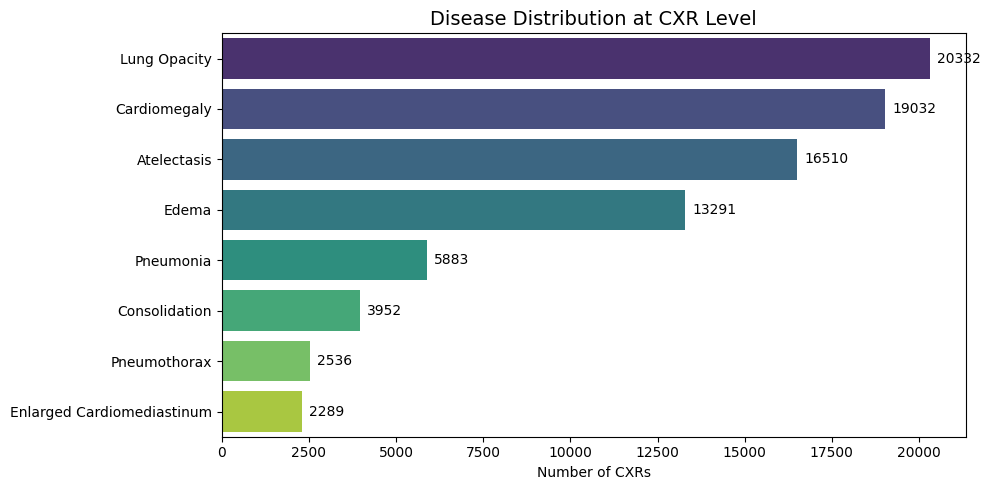

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_stats,
    x="CXR Count",
    y="Disease",
    palette="viridis"
)

for i, v in enumerate(df_stats["CXR Count"]):
    plt.text(v + 200, i, f"{v}", va="center", fontsize=10)

plt.title("Disease Distribution at CXR Level", fontsize=14)
plt.xlabel("Number of CXRs")
plt.ylabel("")
plt.tight_layout()
plt.show()


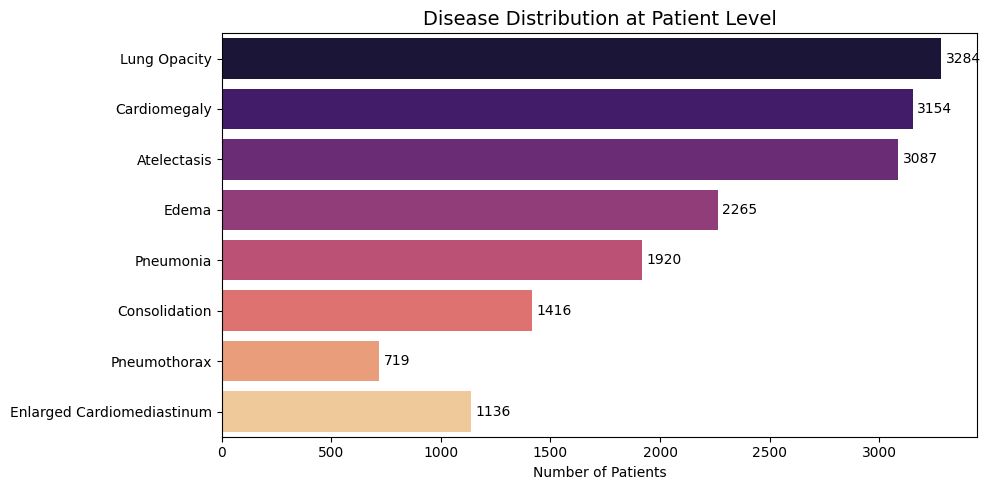

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_stats,
    x="Patient Count",
    y="Disease",
    palette="magma"
)

for i, v in enumerate(df_stats["Patient Count"]):
    plt.text(v + 20, i, f"{v}", va="center", fontsize=10)

plt.title("Disease Distribution at Patient Level", fontsize=14)
plt.xlabel("Number of Patients")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np

def compute_cooccurrence(cxr_all, disease_list):
    """
    cxr_all: concat 后的所有 patient.cxr
    disease_list: LABELS_GOOD
    """
    co_mat = pd.DataFrame(
        0, index=disease_list, columns=disease_list, dtype=int
    )

    for _, row in cxr_all.iterrows():
        present = [d for d in disease_list if row.get(d) == 1]
        for d1 in present:
            for d2 in present:
                co_mat.loc[d1, d2] += 1

    return co_mat


co_mat = compute_cooccurrence(cxr_all, LABELS_GOOD)
co_mat


,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Lung Opacity,Pneumonia,Pneumothorax
Atelectasis,16510,5930,808,2988,785,5280,1301,778
Cardiomegaly,5930,19032,1105,5291,661,5466,1501,628
Consolidation,808,1105,3952,1014,169,1065,764,144
Edema,2988,5291,1014,13291,479,4248,1525,242
Enlarged Cardiomediastinum,785,661,169,479,2289,778,120,187
Lung Opacity,5280,5466,1065,4248,778,20332,3244,504
Pneumonia,1301,1501,764,1525,120,3244,5883,60
Pneumothorax,778,628,144,242,187,504,60,2536


In [20]:
co_mat_norm = co_mat.div(np.diag(co_mat), axis=0)

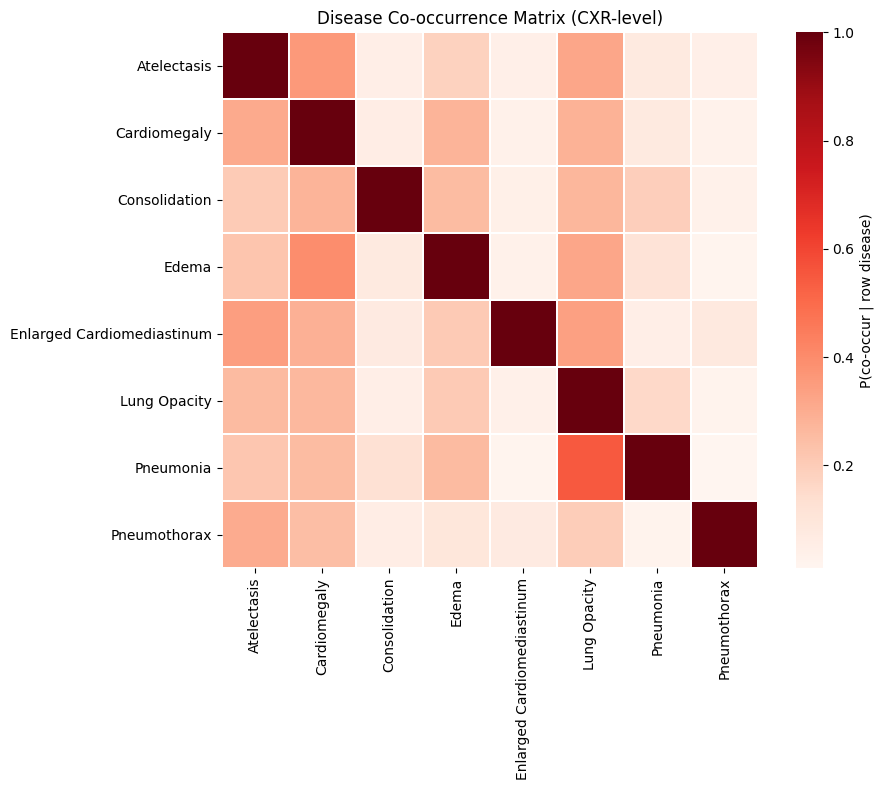

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    co_mat_norm,
    cmap="Reds",
    square=True,
    cbar_kws={"label": "P(co-occur | row disease)"},
    linewidths=0.5
)
plt.title("Disease Co-occurrence Matrix (CXR-level)")
plt.tight_layout()
plt.show()

In [22]:
def is_labeled(row, disease_list):
    return any(row.get(d) == 1 for d in disease_list)

cxr_all["has_label"] = cxr_all.apply(
    lambda r: is_labeled(r, LABELS_GOOD), axis=1
)

cxr_labeled = cxr_all[cxr_all["has_label"]]
cxr_unlabeled = cxr_all[~cxr_all["has_label"]]

print("Labeled CXR:", len(cxr_labeled))
print("Unlabeled CXR:", len(cxr_unlabeled))


Labeled CXR: 49017
Unlabeled CXR: 22708


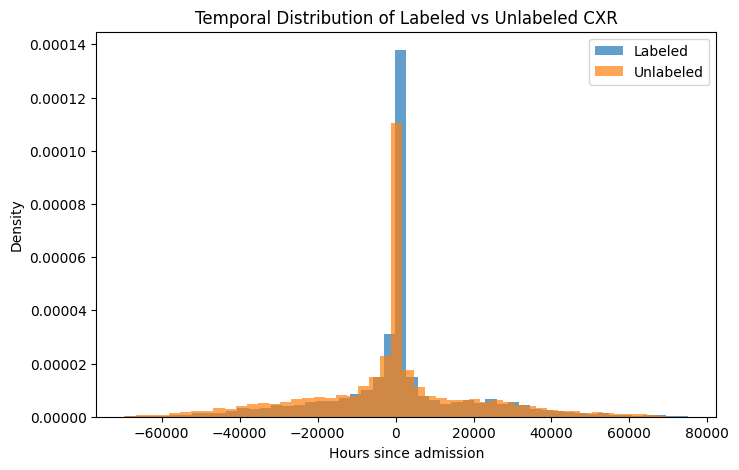

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(
    cxr_labeled["deltacharttime"],
    bins=50,
    alpha=0.7,
    label="Labeled",
    density=True
)
plt.hist(
    cxr_unlabeled["deltacharttime"],
    bins=50,
    alpha=0.7,
    label="Unlabeled",
    density=True
)
plt.xlabel("Hours since admission")
plt.ylabel("Density")
plt.legend()
plt.title("Temporal Distribution of Labeled vs Unlabeled CXR")
plt.show()


In [26]:
cxr_all["hours_since_admit_clipped"] = cxr_all["deltacharttime"].clip(-168, 168)
cxr_all["is_labeled"] = cxr_all[LABELS_GOOD].eq(1).any(axis=1)

(-5000.0, 5000.0)

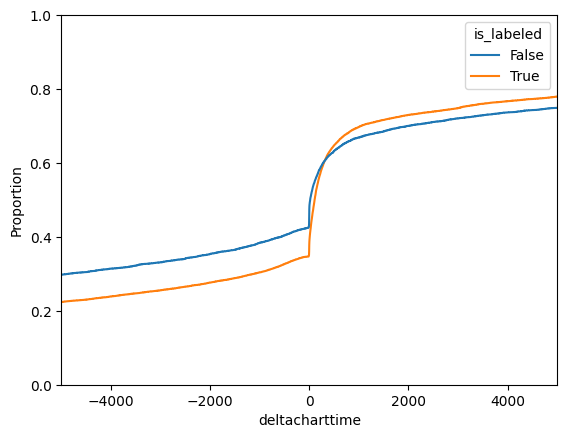

In [28]:
sns.ecdfplot(
    data=cxr_all,
    x="deltacharttime",
    hue="is_labeled"
)
plt.xlim(-5000, 5000)


In [29]:
def in_window(x, l, r):
    return (x >= l) & (x <= r)

for window in [6, 12, 24, 48, 168]:
    print(
        window,
        cxr_all.groupby("is_labeled")
        .apply(lambda df: in_window(df["deltacharttime"], -window, window).mean())
    )


6 is_labeled
False    0.058526
True     0.044638
dtype: float64
12 is_labeled
False    0.069227
True     0.056797
dtype: float64
24 is_labeled
False    0.080809
True     0.072669
dtype: float64
48 is_labeled
False    0.097014
True     0.099782
dtype: float64
168 is_labeled
False    0.150167
True     0.200665
dtype: float64


# embedding

In [31]:
import pickle

chunk_path = "E:/NUS/data/perdata/per_cxr_samples/samples_chunk_0000.pkl"

with open(chunk_path, "rb") as f:
    samples = pickle.load(f)

print("num samples:", len(samples))
print("keys:", samples[0].keys())

num samples: 1446
keys: dict_keys(['meta', 'condition', 'target'])


In [ ]:
def extract_non_text_data(sample):
    """
    从一个 per-CXR sample 中，提取除 text 以外的所有数据
    """
    meta = sample["meta"]

    condition = sample["condition"]

    target = sample["target"]

    data = {
        # meta 
        "meta": {
            "dicom_id": meta["dicom_id"],
            "cxr_time": meta["cxr_time"],
            "delta_hours": meta["delta_hours"],
            "source_pkl": meta["source_pkl"],
        },

        # image reference 
        "image_ref": target["image"],   # 只包含 dicom_id / has_image

        # labels
        "label_multi": target["y_multi"],
        "label_any": target["y_any_disease"],

        # condition 
        "tabular": condition["tabular"],
        "timeseries": condition["timeseries"],
        "diagnosis": condition["diagnosis"],
        "medication": condition["medication"],
    }

    return data


In [33]:
processed = [extract_non_text_data(s) for s in samples]

print("processed samples:", len(processed))
print(processed[0].keys())

processed samples: 1446
dict_keys(['meta', 'image_ref', 'label_multi', 'label_any', 'tabular', 'timeseries', 'diagnosis', 'medication'])


In [34]:
s0 = processed[0]

with open(s0["meta"]["source_pkl"], "rb") as f:
    patient = pickle.load(f)

dicom = s0["meta"]["dicom_id"]
hit = patient.cxr[patient.cxr["dicom_id"] == dicom].iloc[0]

img = patient.imcxr[hit.name]
print(type(img), img.shape)


<class 'numpy.ndarray'> (224, 224)


In [35]:
print(s0["tabular"].keys())
print(s0["tabular"]["demographics"].head())

dict_keys(['demographics', 'admissions', 'icustays', 'transfers'])
        subject_id gender  anchor_age  anchor_year anchor_year_group  dod
286875  10000032.0      F        52.0       2180.0       2014 - 2016  NaN


In [83]:
print(s0["timeseries"].keys())
print(s0["timeseries"]["labevents"].head())

dict_keys(['labevents', 'chartevents', 'inputevents', 'outputevents', 'procedureevents'])
Empty DataFrame
Columns: [labevent_id, subject_id, hadm_id, specimen_id, itemid, charttime, storetime, value, valuenum, valueuom, ref_range_lower, ref_range_upper, flag, priority, comments, label, fluid, category, loinc_code, deltacharttime]
Index: []


In [40]:
print(s0["diagnosis"].keys())
print(s0["medication"].keys())

dict_keys(['diagnoses_icd', 'procedures_icd'])
dict_keys(['prescriptions'])


In [17]:
def export_sample(data, img, sample_id, out_root):
    import os, json, numpy as np

    os.makedirs(out_root, exist_ok=True)
    os.makedirs(f"{out_root}/images", exist_ok=True)
    os.makedirs(f"{out_root}/meta", exist_ok=True)
    os.makedirs(f"{out_root}/tabular", exist_ok=True)
    os.makedirs(f"{out_root}/timeseries", exist_ok=True)

    # 1. image
    np.save(f"{out_root}/images/{sample_id}.npy", img)

    # 2. meta + label
    meta_row = {
        "sample_id": sample_id,
        "dicom_id": data["meta"]["dicom_id"],
        "cxr_time": str(data["meta"]["cxr_time"]),
        "delta_hours": data["meta"]["delta_hours"],
        "label_any": data["label_any"],
        "label_multi": data["label_multi"].tolist(),
        "source_pkl": data["meta"]["source_pkl"],
    }
    with open(f"{out_root}/meta/{sample_id}.json", "w") as f:
        json.dump(meta_row, f, indent=2)

    # 3. tabular
    for k, df in data["tabular"].items():
        if df is not None and len(df) > 0:
            df.to_parquet(f"{out_root}/tabular/{sample_id}_{k}.parquet")

    # 4. timeseries
    for k, df in data["timeseries"].items():
        if df is not None and len(df) > 0:
            df.to_parquet(f"{out_root}/timeseries/{sample_id}_{k}.parquet")


In [ ]:
import os
import json
import pickle
import numpy as np
import pandas as pd


import os
import json
import pickle
import numpy as np
import pandas as pd


def extract_subject_id(patient):
    for attr in ["admissions", "demographics", "icustays", "cxr"]:
        if hasattr(patient, attr):
            df = getattr(patient, attr)
            if df is not None and "subject_id" in df.columns and len(df) > 0:
                sid = df["subject_id"].iloc[0]
                if pd.notna(sid):
                    return int(sid)   # 转成 int
    return None


# 1. output directories
OUT_ROOT = "E:/NUS/data/perdata/train_samples"

IMG_DIR  = os.path.join(OUT_ROOT, "images")
META_DIR = os.path.join(OUT_ROOT, "meta")
TAB_DIR  = os.path.join(OUT_ROOT, "tabular")
TS_DIR   = os.path.join(OUT_ROOT, "timeseries")
TS_MERGED_DIR = os.path.join(OUT_ROOT, "timeseries_merged")

for d in [IMG_DIR, META_DIR, TAB_DIR, TS_DIR, TS_MERGED_DIR]:
    os.makedirs(d, exist_ok=True)


# 2. unified output files
TS_FILES = {
    "labevents":        os.path.join(TS_MERGED_DIR, "labevents.csv"),
    "chartevents":     os.path.join(TS_MERGED_DIR, "chartevents.csv"),
    "inputevents":     os.path.join(TS_MERGED_DIR, "inputevents.csv"),
    "outputevents":    os.path.join(TS_MERGED_DIR, "outputevents.csv"),
    "procedureevents": os.path.join(TS_MERGED_DIR, "procedureevents.csv"),
}

TAB_FILES = {
    # tabular
    "demographics":    os.path.join(TAB_DIR, "demographics.csv"),
    "admissions":      os.path.join(TAB_DIR, "admissions.csv"),
    "icustays":        os.path.join(TAB_DIR, "icustays.csv"),
    "transfers":       os.path.join(TAB_DIR, "transfers.csv"),

    # diagnosis / procedures / medication
    "diagnoses_icd":   os.path.join(TAB_DIR, "diagnoses_icd.csv"),
    "procedures_icd":  os.path.join(TAB_DIR, "procedures_icd.csv"),
    "prescriptions":  os.path.join(TAB_DIR, "prescriptions.csv"),
}



# 3. export one sample
def export_one_sample(sample, sample_id):
    # load patient (only for image) 
    with open(sample["meta"]["source_pkl"], "rb") as f:
        patient = pickle.load(f)

    dicom_id   = sample["meta"]["dicom_id"]
    subject_id = extract_subject_id(patient)


    cxr_row = patient.cxr[patient.cxr["dicom_id"] == dicom_id].iloc[0]

    # image
    img = patient.imcxr[cxr_row.name]
    img_path = os.path.join(IMG_DIR, f"{sample_id}.npy")
    np.save(img_path, img)

    # timeseries (merged by type)
    for name, df in sample["timeseries"].items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]   = sample_id
        df["subject_id"]  = subject_id
        df["cxr_time"]    = sample["meta"]["cxr_time"]
        df["delta_hours"] = sample["meta"]["delta_hours"]

        out_path = TS_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # tabular (merged by type, SAME LOGIC) 
    for name, df in sample.get("tabular", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # diagnosis (merged, same as tabular)
    for name, df in sample.get("diagnosis", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # medication (merged, same as tabular)
    for name, df in sample.get("medication", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )


    # meta index
    return {
        "sample_id": sample_id,
        "subject_id": subject_id,
        "dicom_id": dicom_id,
        "cxr_time": str(sample["meta"]["cxr_time"]),
        "delta_hours": sample["meta"]["delta_hours"],
        "label_any": int(sample["label_any"]),
        "label_multi": sample["label_multi"].tolist(),
        "image_path": img_path,
    }


# 4. main loop
sample_index = []

for i, s in enumerate(processed):
    sample_id = f"s_{i:06d}"

    idx = export_one_sample(s, sample_id)
    sample_index.append(idx)


# 5. write sample index
index_path = os.path.join(META_DIR, "sample_index.json")
with open(index_path, "w") as f:
    json.dump(sample_index, f, indent=2)

print(f"[DONE] total samples = {len(sample_index)}")
print(f"[DONE] sample index saved to {index_path}")


[DONE] total samples = 1446
[DONE] sample index saved to E:/NUS/data/perdata/train_samples\meta\sample_index.json


In [43]:
print(patient.admissions["subject_id"].unique())
print(patient.cxr["subject_id"].unique())

[10003400.]
[10003400.]


In [23]:
sample_index_list = []

for i, s in enumerate(processed):
    sample_id = f"s_{i:06d}"
    idx = export_one_sample(s, sample_id)
    sample_index_list.append(idx)



# text

In [1]:
import pickle

chunk_path = "E:/NUS/data/perdata/per_cxr_text_samples/samples_chunk_0000.pkl"

with open(chunk_path, "rb") as f:
    samples = pickle.load(f)

print("num samples:", len(samples))
print("keys:", samples[0].keys())

num samples: 1446
keys: dict_keys(['meta', 'condition', 'target'])


In [ ]:
def extract_sample_for_storage(sample):
    meta = sample["meta"]

    condition = sample["condition"]

    target = sample["target"]

    data = {
        # meta
        "meta": {
            "dicom_id": meta["dicom_id"],
            "cxr_time": meta["cxr_time"],
            "delta_hours": meta["delta_hours"],
            "source_pkl": meta["source_pkl"],
        },

        # image reference
        "image_ref": target["image"],   # 只包含 dicom_id / has_image

        # labels
        "label_multi": target["y_multi"],
        "label_any": target["y_any_disease"],

        "text": target.get("text_raw", None),

        # condition
        "tabular": condition["tabular"],
        "timeseries": condition["timeseries"],
        "diagnosis": condition["diagnosis"],
        "medication": condition["medication"],
    }

    return data

In [82]:
processed = [extract_sample_for_storage(s) for s in samples]

print("processed samples:", len(processed))
print(processed[0].keys())

processed samples: 1446
dict_keys(['meta', 'image_ref', 'label_multi', 'label_any', 'text', 'tabular', 'timeseries', 'diagnosis', 'medication'])


In [74]:
s0 = processed[0]

import random

for s in random.sample(processed, 5):
    print("="*40)
    print("dicom:", s["meta"]["dicom_id"])
    print("has text:", s["text"] is not None)
    if s["text"]:
        print(s["text"][:200])


dicom: e80af066-34975609-5197442d-f3791f17-694ce6fe
has text: True
EXAMINATION:  CHEST (PORTABLE AP)

INDICATION:  ___ year old man s/p PEA, currently intubated  // interval changes
interval changes

IMPRESSION: 

In comparison with the study of ___, the endotracheal
dicom: 6c900dc0-e87c824e-36a7028c-0f977677-9d944613
has text: False
dicom: fc09630f-022d31c2-408b148f-95c499df-e8a6b18e
has text: True
INDICATION:  ___ year old woman with metastatic adenocarcinoma with malignant
effusion with right CT in place.  24 hour clamp trial.  // Interval change

COMPARISON:  Radiographs from ___

IMPRESSION:
dicom: a5ddfad0-bb071d25-1414caa1-80391e1e-967557d3
has text: False
dicom: 208b89cf-9a77e18e-869881b3-355e39d4-d3e179e9
has text: False


In [ ]:
import os
import json
import pickle
import numpy as np
import pandas as pd


import os
import json
import pickle
import numpy as np
import pandas as pd


def extract_subject_id(patient):
    for attr in ["admissions", "demographics", "icustays", "cxr"]:
        if hasattr(patient, attr):
            df = getattr(patient, attr)
            if df is not None and "subject_id" in df.columns and len(df) > 0:
                sid = df["subject_id"].iloc[0]
                if pd.notna(sid):
                    return int(sid)  
    return None

# 1. output directories
OUT_ROOT = "E:/NUS/data/perdata/train_text_samples"

IMG_DIR  = os.path.join(OUT_ROOT, "images")
META_DIR = os.path.join(OUT_ROOT, "meta")
TAB_DIR  = os.path.join(OUT_ROOT, "tabular")
TS_DIR   = os.path.join(OUT_ROOT, "timeseries")
TS_MERGED_DIR = os.path.join(OUT_ROOT, "timeseries_merged")

for d in [IMG_DIR, META_DIR, TAB_DIR, TS_DIR, TS_MERGED_DIR]:
    os.makedirs(d, exist_ok=True)


# 2. unified output files
TS_FILES = {
    "labevents":        os.path.join(TS_MERGED_DIR, "labevents.csv"),
    "chartevents":     os.path.join(TS_MERGED_DIR, "chartevents.csv"),
    "inputevents":     os.path.join(TS_MERGED_DIR, "inputevents.csv"),
    "outputevents":    os.path.join(TS_MERGED_DIR, "outputevents.csv"),
    "procedureevents": os.path.join(TS_MERGED_DIR, "procedureevents.csv"),
}

TAB_FILES = {
    # tabular
    "demographics":    os.path.join(TAB_DIR, "demographics.csv"),
    "admissions":      os.path.join(TAB_DIR, "admissions.csv"),
    "icustays":        os.path.join(TAB_DIR, "icustays.csv"),
    "transfers":       os.path.join(TAB_DIR, "transfers.csv"),

    # diagnosis / procedures / medication
    "diagnoses_icd":   os.path.join(TAB_DIR, "diagnoses_icd.csv"),
    "procedures_icd":  os.path.join(TAB_DIR, "procedures_icd.csv"),
    "prescriptions":  os.path.join(TAB_DIR, "prescriptions.csv"),
}

TEXT_FILE = os.path.join(OUT_ROOT, "text.csv")


def export_one_sample(sample, sample_id):
    # load patient (only for image)
    with open(sample["meta"]["source_pkl"], "rb") as f:
        patient = pickle.load(f)

    dicom_id   = sample["meta"]["dicom_id"]
    subject_id = extract_subject_id(patient)


    cxr_row = patient.cxr[patient.cxr["dicom_id"] == dicom_id].iloc[0]

    # image
    img = patient.imcxr[cxr_row.name]
    img_path = os.path.join(IMG_DIR, f"{sample_id}.npy")
    np.save(img_path, img)

    # timeseries (merged by type)
    for name, df in sample["timeseries"].items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]   = sample_id
        df["subject_id"]  = subject_id
        df["cxr_time"]    = sample["meta"]["cxr_time"]
        df["delta_hours"] = sample["meta"]["delta_hours"]

        out_path = TS_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # tabular (merged by type, SAME LOGIC)
    for name, df in sample.get("tabular", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # diagnosis (merged, same as tabular)
    for name, df in sample.get("diagnosis", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # medication (merged, same as tabular)
    for name, df in sample.get("medication", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        df.to_csv(
            out_path,
            mode="a",
            header=not os.path.exists(out_path),
            index=False
        )

    # text (merged, one table)
    text = sample.get("text", None)

    if text is not None:
        text_row = {
            "sample_id": sample_id,
            "subject_id": subject_id,
            "dicom_id": dicom_id,
            "cxr_time": sample["meta"]["cxr_time"],
            "delta_hours": sample["meta"]["delta_hours"],
            "text": text,
        }
    else:
        text_row = {
            "sample_id": sample_id,
            "subject_id": subject_id,
            "dicom_id": dicom_id,
            "cxr_time": sample["meta"]["cxr_time"],
            "delta_hours": sample["meta"]["delta_hours"],
            "text": None,
        }

    pd.DataFrame([text_row]).to_csv(
        TEXT_FILE,
        mode="a",
        header=not os.path.exists(TEXT_FILE),
        index=False
    )

    # meta index
    return {
        "sample_id": sample_id,
        "subject_id": subject_id,
        "dicom_id": dicom_id,
        "cxr_time": str(sample["meta"]["cxr_time"]),
        "delta_hours": sample["meta"]["delta_hours"],
        "label_any": int(sample["label_any"]),
        "label_multi": sample["label_multi"].tolist(),
        "image_path": img_path,
    }



# 4. main loop
sample_index = []

for i, s in enumerate(processed):
    sample_id = f"s_{i:06d}"

    idx = export_one_sample(s, sample_id)
    sample_index.append(idx)


# 5. write sample index
index_path = os.path.join(META_DIR, "sample_index.json")
with open(index_path, "w") as f:
    json.dump(sample_index, f, indent=2)

print(f"[DONE] total samples = {len(sample_index)}")
print(f"[DONE] sample index saved to {index_path}")

[DONE] total samples = 1446
[DONE] sample index saved to E:/NUS/data/perdata/train_text_samples\meta\sample_index.json


In [ ]:
import os
import glob
import json
import pickle
import gc
import csv
from collections import OrderedDict

import numpy as np
import pandas as pd

# ========= tqdm (大进度条) =========
try:
    from tqdm import tqdm
except Exception:
    tqdm = None

def make_pbar(iterable=None, total=None, desc="", unit=None):
    if tqdm is None:
        return iterable
    return tqdm(iterable, total=total, desc=desc, unit=unit)

# =============================
# 0) 配置
# =============================
CHUNK_DIR = r"E:/NUS/data/perdata/per_cxr_text_samples"
CHUNK_PATTERN = os.path.join(CHUNK_DIR, "samples_chunk_*.pkl")

OUT_ROOT = r"E:/NUS/data/perdata/train_text_all_samples"

ENABLE_PATIENT_CACHE = True
PATIENT_CACHE_MAX = 8
CLEAR_CACHE_EACH_CHUNK = True

CSV_CHUNKSIZE = 2000           # pandas to_csv 的 chunksize（用于 timeseries/tabular）
STRICT_MODE = False            # True: 出错直接 raise；False: 打印 warning 并跳过

TEXT_BUFFER_SIZE = 2000        # text.csv 缓冲多少行 flush 一次

# =============================
# 1) 读取所有 chunk 文件
# =============================
chunk_files = sorted(glob.glob(CHUNK_PATTERN))
if len(chunk_files) == 0:
    raise FileNotFoundError(f"No chunk files found: {CHUNK_PATTERN}")

print("num chunk files:", len(chunk_files))
print("first file:", chunk_files[0])

# =============================
# 2) extract_sample_for_storage（保持一致）
# =============================
def extract_sample_for_storage(sample):
    meta = sample["meta"]
    condition = sample["condition"]
    target = sample["target"]

    data = {
        "meta": {
            "dicom_id": meta["dicom_id"],
            "cxr_time": meta["cxr_time"],
            "delta_hours": meta["delta_hours"],
            "source_pkl": meta["source_pkl"],
        },
        "image_ref": target["image"],
        "label_multi": target["y_multi"],
        "label_any": target["y_any_disease"],
        "text": target.get("text_raw", None),

        "tabular": condition["tabular"],
        "timeseries": condition["timeseries"],
        "diagnosis": condition["diagnosis"],
        "medication": condition["medication"],
    }
    return data

# =============================
# 3) 输出目录/文件（保持一致）
# =============================
def extract_subject_id(patient):
    for attr in ["admissions", "demographics", "icustays", "cxr"]:
        if hasattr(patient, attr):
            df = getattr(patient, attr)
            if df is not None and "subject_id" in df.columns and len(df) > 0:
                sid = df["subject_id"].iloc[0]
                if pd.notna(sid):
                    return int(sid)
    return None

IMG_DIR  = os.path.join(OUT_ROOT, "images")
META_DIR = os.path.join(OUT_ROOT, "meta")
TAB_DIR  = os.path.join(OUT_ROOT, "tabular")
TS_DIR   = os.path.join(OUT_ROOT, "timeseries")
TS_MERGED_DIR = os.path.join(OUT_ROOT, "timeseries_merged")

for d in [IMG_DIR, META_DIR, TAB_DIR, TS_DIR, TS_MERGED_DIR]:
    os.makedirs(d, exist_ok=True)

TS_FILES = {
    "labevents":        os.path.join(TS_MERGED_DIR, "labevents.csv"),
    "chartevents":      os.path.join(TS_MERGED_DIR, "chartevents.csv"),
    "inputevents":      os.path.join(TS_MERGED_DIR, "inputevents.csv"),
    "outputevents":     os.path.join(TS_MERGED_DIR, "outputevents.csv"),
    "procedureevents":  os.path.join(TS_MERGED_DIR, "procedureevents.csv"),
}

TAB_FILES = {
    "demographics":     os.path.join(TAB_DIR, "demographics.csv"),
    "admissions":       os.path.join(TAB_DIR, "admissions.csv"),
    "icustays":         os.path.join(TAB_DIR, "icustays.csv"),
    "transfers":        os.path.join(TAB_DIR, "transfers.csv"),

    "diagnoses_icd":    os.path.join(TAB_DIR, "diagnoses_icd.csv"),
    "procedures_icd":   os.path.join(TAB_DIR, "procedures_icd.csv"),
    "prescriptions":    os.path.join(TAB_DIR, "prescriptions.csv"),
}

TEXT_FILE = os.path.join(OUT_ROOT, "text.csv")

# =============================
# 4) Text CSV 流式写入器（新增：不再用 DataFrame.to_csv）
# =============================
class TextCSVAppender:
    def __init__(self, path: str, fieldnames: list, buffer_size: int = 2000):
        self.path = path
        self.fieldnames = fieldnames
        self.buffer_size = buffer_size
        self.buffer = []

        os.makedirs(os.path.dirname(path), exist_ok=True)
        need_header = (not os.path.exists(path)) or (os.path.getsize(path) == 0)

        self.f = open(path, "a", newline="", encoding="utf-8")
        self.writer = csv.DictWriter(self.f, fieldnames=self.fieldnames)

        if need_header:
            self.writer.writeheader()
            self.f.flush()

    def add_row(self, row: dict):
        self.buffer.append(row)
        if len(self.buffer) >= self.buffer_size:
            self.flush()

    def flush(self):
        if not self.buffer:
            return
        self.writer.writerows(self.buffer)
        self.f.flush()
        self.buffer.clear()

    def close(self):
        self.flush()
        self.f.close()

# =============================
# 5) LRU patient cache（不改输出，只控内存）
# =============================
_patient_cache = OrderedDict()

def load_patient_cached(source_pkl):
    if not ENABLE_PATIENT_CACHE:
        with open(source_pkl, "rb") as f:
            return pickle.load(f)

    if source_pkl in _patient_cache:
        _patient_cache.move_to_end(source_pkl)
        return _patient_cache[source_pkl]

    with open(source_pkl, "rb") as f:
        patient = pickle.load(f)

    _patient_cache[source_pkl] = patient
    _patient_cache.move_to_end(source_pkl)

    if len(_patient_cache) > PATIENT_CACHE_MAX:
        _patient_cache.popitem(last=False)

    return patient

def _append_df_to_csv(df: pd.DataFrame, out_path: str):
    df.to_csv(
        out_path,
        mode="a",
        header=not os.path.exists(out_path),
        index=False,
        chunksize=CSV_CHUNKSIZE if CSV_CHUNKSIZE else None,
    )

# =============================
# 6) export_one_sample：逻辑一致，仅 text 写入方式改为 TextCSVAppender
# =============================
def export_one_sample(sample, sample_id, text_appender: TextCSVAppender):
    patient = load_patient_cached(sample["meta"]["source_pkl"])

    dicom_id   = sample["meta"]["dicom_id"]
    subject_id = extract_subject_id(patient)

    cxr_match = patient.cxr[patient.cxr["dicom_id"] == dicom_id]
    if cxr_match is None or len(cxr_match) == 0:
        raise KeyError(f"dicom_id not found in patient.cxr: {dicom_id}")

    cxr_row = cxr_match.iloc[0]

    # image
    img = patient.imcxr[cxr_row.name]
    img_path = os.path.join(IMG_DIR, f"{sample_id}.npy")
    np.save(img_path, img)

    # timeseries
    for name, df in sample["timeseries"].items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]   = sample_id
        df["subject_id"]  = subject_id
        df["cxr_time"]    = sample["meta"]["cxr_time"]
        df["delta_hours"] = sample["meta"]["delta_hours"]

        out_path = TS_FILES[name]
        _append_df_to_csv(df, out_path)

    # tabular
    for name, df in sample.get("tabular", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        _append_df_to_csv(df, out_path)

    # diagnosis
    for name, df in sample.get("diagnosis", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        _append_df_to_csv(df, out_path)

    # medication
    for name, df in sample.get("medication", {}).items():
        if df is None or len(df) == 0:
            continue

        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id

        out_path = TAB_FILES[name]
        _append_df_to_csv(df, out_path)

    # text（改这里：不再 DataFrame.to_csv）
    text = sample.get("text", None)
    text_row = {
        "sample_id": sample_id,
        "subject_id": subject_id,
        "dicom_id": dicom_id,
        "cxr_time": sample["meta"]["cxr_time"],
        "delta_hours": sample["meta"]["delta_hours"],
        "text": text if text is not None else None,
    }
    text_appender.add_row(text_row)

    # meta index
    return {
        "sample_id": sample_id,
        "subject_id": subject_id,
        "dicom_id": dicom_id,
        "cxr_time": str(sample["meta"]["cxr_time"]),
        "delta_hours": sample["meta"]["delta_hours"],
        "label_any": int(sample["label_any"]),
        "label_multi": sample["label_multi"].tolist(),
        "image_path": img_path,
    }

# =============================
# 7) 主流程：逐文件读取 + 大进度条 + sample_index 流式写入
# =============================
index_path = os.path.join(META_DIR, "sample_index.json")
index_jsonl_path = os.path.join(META_DIR, "sample_index.jsonl")

global_i = 0
skipped = 0

total_pbar = tqdm(desc="Total samples processed", unit="sample") if tqdm is not None else None

TEXT_FIELDS = ["sample_id", "subject_id", "dicom_id", "cxr_time", "delta_hours", "text"]
text_appender = TextCSVAppender(TEXT_FILE, fieldnames=TEXT_FIELDS, buffer_size=TEXT_BUFFER_SIZE)

try:
    with open(index_path, "w", encoding="utf-8") as jf, open(index_jsonl_path, "a", encoding="utf-8") as jlf:
        jf.write("[\n")
        first = True

        files_pbar = make_pbar(chunk_files, total=len(chunk_files), desc="Processing chunk files", unit="file")
        for chunk_fp in files_pbar:
            with open(chunk_fp, "rb") as f:
                samples = pickle.load(f)

            inner_desc = f"Exporting ({os.path.basename(chunk_fp)})"
            for raw in make_pbar(samples, total=len(samples), desc=inner_desc, unit="sample"):
                try:
                    s = extract_sample_for_storage(raw)
                    sample_id = f"s_{global_i:06d}"

                    idx = export_one_sample(s, sample_id, text_appender)

                    # JSON array（流式）
                    if not first:
                        jf.write(",\n")
                    jf.write(json.dumps(idx, ensure_ascii=False))
                    first = False

                    # JSONL（每行一个）
                    jlf.write(json.dumps(idx, ensure_ascii=False) + "\n")

                    global_i += 1
                    if total_pbar is not None:
                        total_pbar.update(1)

                except Exception as e:
                    skipped += 1
                    msg = f"[WARN] skip sample in {os.path.basename(chunk_fp)} (skipped={skipped}): {repr(e)}"
                    if STRICT_MODE:
                        raise RuntimeError(msg) from e
                    else:
                        print(msg)

                finally:
                    # 释放引用，避免堆积
                    try:
                        del s
                    except Exception:
                        pass
                    del raw

                    if global_i % 200 == 0:
                        text_appender.flush()
                        gc.collect()

            # chunk 结束：清理
            del samples
            text_appender.flush()
            if CLEAR_CACHE_EACH_CHUNK:
                _patient_cache.clear()
            gc.collect()

        jf.write("\n]\n")

finally:
    text_appender.close()
    if total_pbar is not None:
        total_pbar.close()

print(f"[DONE] total exported samples = {global_i}")
print(f"[DONE] skipped samples = {skipped}")
print(f"[DONE] sample index saved to: {index_path}")
print(f"[DONE] sample index jsonl saved to: {index_jsonl_path}")
print(f"[DONE] text saved to: {TEXT_FILE}")


num chunk files: 50
first file: E:/NUS/data/perdata/per_cxr_text_samples\samples_chunk_0000.pkl


Total samples processed: 0sample [00:00, ?sample/s]
Total samples processed: 1sample [00:03,  3.88s/sample]
Total samples processed: 3sample [00:04,  1.06s/sample]
Total samples processed: 5sample [00:04,  1.82sample/s]
Total samples processed: 7sample [00:04,  2.90sample/s]
Total samples processed: 9sample [00:04,  3.99sample/s]
Total samples processed: 11sample [00:04,  5.27sample/s]
Total samples processed: 13sample [00:04,  6.53sample/s]
Total samples processed: 15sample [00:04,  7.78sample/s]
Total samples processed: 17sample [00:05,  7.12sample/s]
Total samples processed: 19sample [00:05,  8.29sample/s]
Total samples processed: 21sample [00:05,  9.19sample/s]
Total samples processed: 23sample [00:05, 10.02sample/s]
Total samples processed: 25sample [00:05,  9.92sample/s]
Total samples processed: 27sample [00:06, 10.16sample/s]
Total samples processed: 29sample [00:06, 10.85sample/s]
Total samples processed: 31sample [00:06,  9.21sample/s]
Total samples processed: 33sample [00:06,

In [1]:
import os
import glob
import json
import pickle
import gc
import csv
from collections import OrderedDict

import numpy as np
import pandas as pd

# ========= tqdm（只用于文件级进度条）=========
try:
    from tqdm import tqdm
except Exception:
    tqdm = None

def file_pbar(files, desc="Processing files"):
    if tqdm is None:
        return files
    return tqdm(files, total=len(files), desc=desc)

# =============================
# 0) 配置
# =============================
CHUNK_DIR = r"E:/NUS/data/perdata/per_cxr_text_samples"
CHUNK_PATTERN = os.path.join(CHUNK_DIR, "samples_chunk_*.pkl")

OUT_ROOT = r"E:/NUS/data/perdata/train_text_all_samples"

# ===== 断点续跑：从哪个 chunk 开始（这里填 24 就是从 0024 开始）=====
RESUME_FROM_CHUNK = 24

# ===== 跑完是否重建 sample_index.json（从 jsonl 流式生成，不占内存）=====
REBUILD_INDEX_JSON_FROM_JSONL = True

ENABLE_PATIENT_CACHE = True
PATIENT_CACHE_MAX = 8
CLEAR_CACHE_EACH_CHUNK = True

CSV_CHUNKSIZE = 2000           # pandas to_csv 分块写
STRICT_MODE = False            # True: 出错直接 raise；False: 打印 warning 并跳过

TEXT_BUFFER_SIZE = 2000        # text.csv 缓冲行数

# =============================
# 1) 读取所有 chunk 文件（并从指定 chunk 继续）
# =============================
def chunk_id_from_path(fp: str) -> int:
    # samples_chunk_0023.pkl -> 23
    name = os.path.basename(fp)
    return int(name.replace("samples_chunk_", "").replace(".pkl", ""))

all_chunk_files = sorted(glob.glob(CHUNK_PATTERN))
if len(all_chunk_files) == 0:
    raise FileNotFoundError(f"No chunk files found: {CHUNK_PATTERN}")

chunk_files = [fp for fp in all_chunk_files if chunk_id_from_path(fp) >= RESUME_FROM_CHUNK]
if len(chunk_files) == 0:
    raise FileNotFoundError(f"No chunk files >= {RESUME_FROM_CHUNK:04d} found under: {CHUNK_DIR}")

print("num total chunk files:", len(all_chunk_files))
print("resume from chunk:", RESUME_FROM_CHUNK)
print("num remaining chunk files:", len(chunk_files))
print("first remaining file:", os.path.basename(chunk_files[0]))

# =============================
# 2) extract_sample_for_storage（保持一致）
# =============================
def extract_sample_for_storage(sample):
    meta = sample["meta"]
    condition = sample["condition"]
    target = sample["target"]

    return {
        "meta": {
            "dicom_id": meta["dicom_id"],
            "cxr_time": meta["cxr_time"],
            "delta_hours": meta["delta_hours"],
            "source_pkl": meta["source_pkl"],
        },
        "image_ref": target["image"],
        "label_multi": target["y_multi"],
        "label_any": target["y_any_disease"],
        "text": target.get("text_raw", None),

        "tabular": condition["tabular"],
        "timeseries": condition["timeseries"],
        "diagnosis": condition["diagnosis"],
        "medication": condition["medication"],
    }

# =============================
# 3) 输出目录/文件（保持一致）
# =============================
def extract_subject_id(patient):
    for attr in ["admissions", "demographics", "icustays", "cxr"]:
        if hasattr(patient, attr):
            df = getattr(patient, attr)
            if df is not None and "subject_id" in df.columns and len(df) > 0:
                sid = df["subject_id"].iloc[0]
                if pd.notna(sid):
                    return int(sid)
    return None

IMG_DIR  = os.path.join(OUT_ROOT, "images")
META_DIR = os.path.join(OUT_ROOT, "meta")
TAB_DIR  = os.path.join(OUT_ROOT, "tabular")
TS_MERGED_DIR = os.path.join(OUT_ROOT, "timeseries_merged")

for d in [IMG_DIR, META_DIR, TAB_DIR, TS_MERGED_DIR]:
    os.makedirs(d, exist_ok=True)

TS_FILES = {
    "labevents":        os.path.join(TS_MERGED_DIR, "labevents.csv"),
    "chartevents":      os.path.join(TS_MERGED_DIR, "chartevents.csv"),
    "inputevents":      os.path.join(TS_MERGED_DIR, "inputevents.csv"),
    "outputevents":     os.path.join(TS_MERGED_DIR, "outputevents.csv"),
    "procedureevents":  os.path.join(TS_MERGED_DIR, "procedureevents.csv"),
}

TAB_FILES = {
    "demographics":     os.path.join(TAB_DIR, "demographics.csv"),
    "admissions":       os.path.join(TAB_DIR, "admissions.csv"),
    "icustays":         os.path.join(TAB_DIR, "icustays.csv"),
    "transfers":        os.path.join(TAB_DIR, "transfers.csv"),

    "diagnoses_icd":    os.path.join(TAB_DIR, "diagnoses_icd.csv"),
    "procedures_icd":   os.path.join(TAB_DIR, "procedures_icd.csv"),
    "prescriptions":    os.path.join(TAB_DIR, "prescriptions.csv"),
}

TEXT_FILE = os.path.join(OUT_ROOT, "text.csv")

# =============================
# 4) text.csv 流式写入器（批量 flush）
# =============================
class TextCSVAppender:
    def __init__(self, path: str, fieldnames: list, buffer_size: int = 2000):
        self.path = path
        self.fieldnames = fieldnames
        self.buffer_size = buffer_size
        self.buffer = []

        os.makedirs(os.path.dirname(path), exist_ok=True)
        need_header = (not os.path.exists(path)) or (os.path.getsize(path) == 0)

        self.f = open(path, "a", newline="", encoding="utf-8")
        self.writer = csv.DictWriter(self.f, fieldnames=self.fieldnames)
        if need_header:
            self.writer.writeheader()
            self.f.flush()

    def add_row(self, row: dict):
        self.buffer.append(row)
        if len(self.buffer) >= self.buffer_size:
            self.flush()

    def flush(self):
        if not self.buffer:
            return
        self.writer.writerows(self.buffer)
        self.f.flush()
        self.buffer.clear()

    def close(self):
        self.flush()
        self.f.close()

# =============================
# 5) LRU patient cache
# =============================
_patient_cache = OrderedDict()

def load_patient_cached(source_pkl):
    if not ENABLE_PATIENT_CACHE:
        with open(source_pkl, "rb") as f:
            return pickle.load(f)

    if source_pkl in _patient_cache:
        _patient_cache.move_to_end(source_pkl)
        return _patient_cache[source_pkl]

    with open(source_pkl, "rb") as f:
        patient = pickle.load(f)

    _patient_cache[source_pkl] = patient
    _patient_cache.move_to_end(source_pkl)

    if len(_patient_cache) > PATIENT_CACHE_MAX:
        _patient_cache.popitem(last=False)

    return patient

def _append_df_to_csv(df: pd.DataFrame, out_path: str):
    df.to_csv(
        out_path,
        mode="a",
        header=not os.path.exists(out_path),
        index=False,
        chunksize=CSV_CHUNKSIZE if CSV_CHUNKSIZE else None,
    )

# =============================
# 6) export_one_sample（逻辑一致）
# =============================
def export_one_sample(sample, sample_id, text_appender: TextCSVAppender):
    patient = load_patient_cached(sample["meta"]["source_pkl"])

    dicom_id   = sample["meta"]["dicom_id"]
    subject_id = extract_subject_id(patient)

    cxr_match = patient.cxr[patient.cxr["dicom_id"] == dicom_id]
    if cxr_match is None or len(cxr_match) == 0:
        raise KeyError(f"dicom_id not found in patient.cxr: {dicom_id}")

    cxr_row = cxr_match.iloc[0]

    # image
    img = patient.imcxr[cxr_row.name]
    img_path = os.path.join(IMG_DIR, f"{sample_id}.npy")
    np.save(img_path, img)

    # timeseries
    for name, df in sample["timeseries"].items():
        if df is None or len(df) == 0:
            continue
        df = df.copy()
        df["sample_id"]   = sample_id
        df["subject_id"]  = subject_id
        df["cxr_time"]    = sample["meta"]["cxr_time"]
        df["delta_hours"] = sample["meta"]["delta_hours"]
        out_path = TS_FILES[name]
        _append_df_to_csv(df, out_path)

    # tabular
    for name, df in sample.get("tabular", {}).items():
        if df is None or len(df) == 0:
            continue
        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id
        out_path = TAB_FILES[name]
        _append_df_to_csv(df, out_path)

    # diagnosis
    for name, df in sample.get("diagnosis", {}).items():
        if df is None or len(df) == 0:
            continue
        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id
        out_path = TAB_FILES[name]
        _append_df_to_csv(df, out_path)

    # medication
    for name, df in sample.get("medication", {}).items():
        if df is None or len(df) == 0:
            continue
        df = df.copy()
        df["sample_id"]  = sample_id
        df["subject_id"] = subject_id
        out_path = TAB_FILES[name]
        _append_df_to_csv(df, out_path)

    # text（批量写）
    text = sample.get("text", None)
    text_appender.add_row({
        "sample_id": sample_id,
        "subject_id": subject_id,
        "dicom_id": dicom_id,
        "cxr_time": sample["meta"]["cxr_time"],
        "delta_hours": sample["meta"]["delta_hours"],
        "text": text if text is not None else None,
    })

    return {
        "sample_id": sample_id,
        "subject_id": subject_id,
        "dicom_id": dicom_id,
        "cxr_time": str(sample["meta"]["cxr_time"]),
        "delta_hours": sample["meta"]["delta_hours"],
        "label_any": int(sample["label_any"]),
        "label_multi": sample["label_multi"].tolist(),
        "image_path": img_path,
    }

# =============================
# 7) 断点续跑：从 sample_index.jsonl 推断下一个 global_i
# =============================
index_path = os.path.join(META_DIR, "sample_index.json")
index_jsonl_path = os.path.join(META_DIR, "sample_index.jsonl")

def get_next_global_i_from_jsonl(jsonl_path: str) -> int:
    """
    从 sample_index.jsonl 最后一行解析 sample_id，返回下一个 global_i。
    不会把整个文件读入内存。
    """
    if (not os.path.exists(jsonl_path)) or (os.path.getsize(jsonl_path) == 0):
        return 0

    with open(jsonl_path, "rb") as f:
        f.seek(0, os.SEEK_END)
        end = f.tell()
        pos = end - 1

        # 向前找最后一个完整行
        while pos >= 0:
            f.seek(pos)
            b = f.read(1)
            if b == b"\n" and pos != end - 1:
                break
            pos -= 1

        if pos < 0:
            f.seek(0)
        last_line = f.readline().decode("utf-8").strip()

    if not last_line:
        return 0
    obj = json.loads(last_line)
    sid = obj["sample_id"]  # s_000123
    return int(sid.split("_")[1]) + 1

# =============================
# 8) 主流程：只有文件级进度条 + 追加写 jsonl（不覆盖旧数据）
# =============================
global_i = get_next_global_i_from_jsonl(index_jsonl_path)
skipped = 0

print(f"[RESUME] next global_i = {global_i} (from {os.path.basename(index_jsonl_path)} if exists)")

TEXT_FIELDS = ["sample_id", "subject_id", "dicom_id", "cxr_time", "delta_hours", "text"]
text_appender = TextCSVAppender(TEXT_FILE, fieldnames=TEXT_FIELDS, buffer_size=TEXT_BUFFER_SIZE)

# 只追加写 jsonl（安全）
jlf = open(index_jsonl_path, "a", encoding="utf-8")

try:
    for chunk_fp in file_pbar(chunk_files, desc="Processing chunk files"):
        print(f"[RUN] {os.path.basename(chunk_fp)} start, global_i={global_i}")

        with open(chunk_fp, "rb") as f:
            samples = pickle.load(f)

        for raw in samples:
            try:
                s = extract_sample_for_storage(raw)
                sample_id = f"s_{global_i:06d}"

                idx = export_one_sample(s, sample_id, text_appender)

                # JSONL（追加）
                jlf.write(json.dumps(idx, ensure_ascii=False) + "\n")
                global_i += 1

            except Exception as e:
                skipped += 1
                msg = f"[WARN] skip sample in {os.path.basename(chunk_fp)} (skipped={skipped}): {repr(e)}"
                if STRICT_MODE:
                    raise RuntimeError(msg) from e
                else:
                    print(msg)

            finally:
                try:
                    del s
                except Exception:
                    pass
                del raw

                # 定期 flush + gc（防止 notebook 堆积）
                if global_i % 500 == 0:
                    text_appender.flush()
                    jlf.flush()
                    gc.collect()

        # chunk 结束：清理
        del samples
        text_appender.flush()
        jlf.flush()
        if CLEAR_CACHE_EACH_CHUNK:
            _patient_cache.clear()
        gc.collect()

        print(f"[RUN] {os.path.basename(chunk_fp)} done, global_i={global_i}")

finally:
    text_appender.close()
    jlf.close()

print(f"[DONE] total exported samples (next global_i) = {global_i}")
print(f"[DONE] skipped samples = {skipped}")
print(f"[DONE] sample index jsonl saved to: {index_jsonl_path}")
print(f"[DONE] text saved to: {TEXT_FILE}")

# =============================
# 9) 可选：从 jsonl 流式重建 sample_index.json（不会占内存）
# =============================
def rebuild_index_json_from_jsonl(jsonl_path: str, json_path: str):
    if (not os.path.exists(jsonl_path)) or (os.path.getsize(jsonl_path) == 0):
        print("[REBUILD] jsonl not found or empty, skip rebuild:", jsonl_path)
        return

    with open(jsonl_path, "r", encoding="utf-8") as fin, open(json_path, "w", encoding="utf-8") as fout:
        fout.write("[\n")
        first = True
        for line in fin:
            line = line.strip()
            if not line:
                continue
            if not first:
                fout.write(",\n")
            fout.write(line)
            first = False
        fout.write("\n]\n")

if REBUILD_INDEX_JSON_FROM_JSONL:
    rebuild_index_json_from_jsonl(index_jsonl_path, index_path)
    print(f"[REBUILD] sample index json saved to: {index_path}")


num total chunk files: 50
resume from chunk: 24
num remaining chunk files: 26
first remaining file: samples_chunk_0024.pkl
[RESUME] next global_i = 71725 (from sample_index.jsonl if exists)


Processing chunk files:   0%|          | 0/26 [00:00<?, ?it/s]

[RUN] samples_chunk_0024.pkl start, global_i=71725


Processing chunk files:   4%|▍         | 1/26 [02:46<1:09:10, 166.01s/it]

[RUN] samples_chunk_0024.pkl done, global_i=72988
[RUN] samples_chunk_0025.pkl start, global_i=72988


Processing chunk files:   8%|▊         | 2/26 [05:28<1:05:41, 164.21s/it]

[RUN] samples_chunk_0025.pkl done, global_i=74357
[RUN] samples_chunk_0026.pkl start, global_i=74357


Processing chunk files:  12%|█▏        | 3/26 [09:16<1:13:56, 192.91s/it]

[RUN] samples_chunk_0026.pkl done, global_i=76304
[RUN] samples_chunk_0027.pkl start, global_i=76304


Processing chunk files:  15%|█▌        | 4/26 [11:06<58:43, 160.18s/it]  

[RUN] samples_chunk_0027.pkl done, global_i=77249
[RUN] samples_chunk_0028.pkl start, global_i=77249


Processing chunk files:  19%|█▉        | 5/26 [13:27<53:39, 153.30s/it]

[RUN] samples_chunk_0028.pkl done, global_i=78460
[RUN] samples_chunk_0029.pkl start, global_i=78460


Processing chunk files:  23%|██▎       | 6/26 [17:53<1:03:55, 191.80s/it]

[RUN] samples_chunk_0029.pkl done, global_i=80652
[RUN] samples_chunk_0030.pkl start, global_i=80652


Processing chunk files:  27%|██▋       | 7/26 [20:35<57:36, 181.90s/it]  

[RUN] samples_chunk_0030.pkl done, global_i=82017
[RUN] samples_chunk_0031.pkl start, global_i=82017


Processing chunk files:  31%|███       | 8/26 [23:38<54:45, 182.51s/it]

[RUN] samples_chunk_0031.pkl done, global_i=83466
[RUN] samples_chunk_0032.pkl start, global_i=83466


Processing chunk files:  35%|███▍      | 9/26 [25:44<46:38, 164.60s/it]

[RUN] samples_chunk_0032.pkl done, global_i=84515
[RUN] samples_chunk_0033.pkl start, global_i=84515


Processing chunk files:  38%|███▊      | 10/26 [28:54<46:00, 172.52s/it]

[RUN] samples_chunk_0033.pkl done, global_i=85918
[RUN] samples_chunk_0034.pkl start, global_i=85918


Processing chunk files:  42%|████▏     | 11/26 [31:23<41:19, 165.28s/it]

[RUN] samples_chunk_0034.pkl done, global_i=87049
[RUN] samples_chunk_0035.pkl start, global_i=87049


Processing chunk files:  46%|████▌     | 12/26 [32:54<33:16, 142.61s/it]

[RUN] samples_chunk_0035.pkl done, global_i=87729
[RUN] samples_chunk_0036.pkl start, global_i=87729


Processing chunk files:  50%|█████     | 13/26 [35:49<33:04, 152.63s/it]

[RUN] samples_chunk_0036.pkl done, global_i=89166
[RUN] samples_chunk_0037.pkl start, global_i=89166


Processing chunk files:  54%|█████▍    | 14/26 [39:01<32:52, 164.36s/it]

[RUN] samples_chunk_0037.pkl done, global_i=90720
[RUN] samples_chunk_0038.pkl start, global_i=90720


Processing chunk files:  58%|█████▊    | 15/26 [41:07<28:02, 152.93s/it]

[RUN] samples_chunk_0038.pkl done, global_i=91723
[RUN] samples_chunk_0039.pkl start, global_i=91723


Processing chunk files:  62%|██████▏   | 16/26 [44:35<28:14, 169.46s/it]

[RUN] samples_chunk_0039.pkl done, global_i=93398
[RUN] samples_chunk_0040.pkl start, global_i=93398


Processing chunk files:  65%|██████▌   | 17/26 [47:38<26:02, 173.67s/it]

[RUN] samples_chunk_0040.pkl done, global_i=94699
[RUN] samples_chunk_0041.pkl start, global_i=94699


Processing chunk files:  69%|██████▉   | 18/26 [51:21<25:07, 188.40s/it]

[RUN] samples_chunk_0041.pkl done, global_i=96289
[RUN] samples_chunk_0042.pkl start, global_i=96289


Processing chunk files:  73%|███████▎  | 19/26 [54:06<21:09, 181.29s/it]

[RUN] samples_chunk_0042.pkl done, global_i=97571
[RUN] samples_chunk_0043.pkl start, global_i=97571


Processing chunk files:  77%|███████▋  | 20/26 [59:23<22:12, 222.12s/it]

[RUN] samples_chunk_0043.pkl done, global_i=100203
[RUN] samples_chunk_0044.pkl start, global_i=100203


Processing chunk files:  81%|████████  | 21/26 [1:05:04<21:28, 257.66s/it]

[RUN] samples_chunk_0044.pkl done, global_i=103138
[RUN] samples_chunk_0045.pkl start, global_i=103138


Processing chunk files:  85%|████████▍ | 22/26 [1:07:40<15:09, 227.28s/it]

[RUN] samples_chunk_0045.pkl done, global_i=104170
[RUN] samples_chunk_0046.pkl start, global_i=104170


Processing chunk files:  88%|████████▊ | 23/26 [1:10:24<10:24, 208.11s/it]

[RUN] samples_chunk_0046.pkl done, global_i=105516
[RUN] samples_chunk_0047.pkl start, global_i=105516


Processing chunk files:  92%|█████████▏| 24/26 [1:13:21<06:37, 198.89s/it]

[RUN] samples_chunk_0047.pkl done, global_i=106868
[RUN] samples_chunk_0048.pkl start, global_i=106868


Processing chunk files:  96%|█████████▌| 25/26 [1:17:45<03:38, 218.38s/it]

[RUN] samples_chunk_0048.pkl done, global_i=108739
[RUN] samples_chunk_0049.pkl start, global_i=108739


Processing chunk files: 100%|██████████| 26/26 [1:20:21<00:00, 185.44s/it]

[RUN] samples_chunk_0049.pkl done, global_i=109968
[DONE] total exported samples (next global_i) = 109968
[DONE] skipped samples = 0
[DONE] sample index jsonl saved to: E:/NUS/data/perdata/train_text_all_samples\meta\sample_index.jsonl
[DONE] text saved to: E:/NUS/data/perdata/train_text_all_samples\text.csv


[REBUILD] sample index json saved to: E:/NUS/data/perdata/train_text_all_samples\meta\sample_index.json
